In [2]:
%matplotlib inline

In [3]:
import os
import numpy as np

In [6]:
path = u'D:/диплом/dataset2.2/dataset2.2/'

In [7]:
dirs = os.listdir(path)

In [12]:
def countDir(dir):
    resultsPath = path+ dir+u'/Result/address'
    files = os.listdir(resultsPath)
    processed = [fname.split('.')[1] for fname in files if fname.endswith('.txt')]
    return np.unique(processed, return_counts = True)

In [13]:
# tokens = np.array([], np.str)
suffix_count = {}
for d in dirs:
    print d
    suffixes, count = countDir(d)
    print suffixes
    print count
    for i in range(len(suffixes)):
        suffix_count[suffixes[i]] = suffix_count.get(suffixes[i], 0) + count[i]
#     tokens = np.unique(np.concatenate((tokens, suffixes)))

7-11.1
[u'Bad' u'Empty' u'Good' u'Unknown']
[29  1 57 13]
7-11.2
[u'Bad' u'Empty' u'Good' u'Unknown']
[36  1 56  7]
7-11.3
[u'Bad' u'Good' u'Unknown']
[35 56  9]
7-11.4
[u'Bad' u'Empty' u'Good' u'Unknown']
[31  2 58  9]
7-11.5
[u'Bad' u'Empty' u'Good' u'Unknown']
[31  1 62  6]
7-Eleven.001
[u'Bad' u'Empty' u'Good' u'Unknown']
[37  2 49 12]
7-Eleven.002
[u'Bad' u'Good' u'Unknown']
[24 67  9]
7-Eleven.003
[u'Bad' u'Good' u'Unknown']
[37 55  8]
99 Cents Only Stores.001
[u'Bad' u'Good' u'Unknown']
[29 59 12]
99 Cents Only Stores.002
[u'Bad' u'Good' u'Unknown']
[28 65  7]
99 Cents Only Stores.003
[u'Bad' u'Good' u'Unknown']
[23 60 17]
99 Cents Only Stores.1
[u'Bad' u'Good' u'Unknown']
[38 50 12]
99 Cents Only Stores.2
[u'Bad' u'Good' u'Unknown']
[31 54 15]
99 Cents Only Stores.3
[u'Bad' u'Good' u'Unknown']
[28 62 10]
99 Cents Only Stores.4
[u'Bad' u'Good' u'Unknown']
[37 51 12]
99 Cents Only Stores.5
[u'Bad' u'Empty' u'Good' u'Unknown']
[33  1 53 12]
Ace Hardware.001
[u'Bad' u'Empty' u'Good

In [16]:
tokens = suffix_count.keys()
print tokens

[u'Perfect', u'Good', u'Unknown', u'Bad', u'errors', u'Empty']


In [17]:
print suffix_count

{u'Perfect': 6653, u'Good': 79610, u'Unknown': 19578, u'Bad': 118264, u'errors': 1, u'Empty': 6873}


In [18]:
import pandas as pd

In [19]:
distribution = pd.DataFrame(columns = np.concatenate((['name'], tokens)) )

In [20]:
distribution.columns

Index([u'name', u'Perfect', u'Good', u'Unknown', u'Bad', u'errors', u'Empty'], dtype='object')

In [21]:
for i in range(len(dirs)):
    d = dirs[i]
    print d
    distribution.loc[i] = [d, 0, 0, 0, 0, 0, 0]
    #distribution.loc[i] = np.zeros(7, np.long)
    # distribution['name'][i]=d
    suffixes, count = countDir(d)
    for j in range(len(suffixes)):
        distribution[suffixes[j]][i] = count[j]

7-11.1
7-11.2


C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


7-11.3
7-11.4
7-11.5
7-Eleven.001
7-Eleven.002
7-Eleven.003
99 Cents Only Stores.001
99 Cents Only Stores.002
99 Cents Only Stores.003
99 Cents Only Stores.1
99 Cents Only Stores.2
99 Cents Only Stores.3
99 Cents Only Stores.4
99 Cents Only Stores.5
Ace Hardware.001
Ace Hardware.002
Ace Hardware.003
Ace Hardware.1
Ace Hardware.2
Ace Hardware.3
Ace Hardware.4
Ace Hardware.5
ACME.001
ACME.002
ACME.003
ACME.1
ACME.2
ACME.3
ACME.4
ACME.5
Aeropostale.001
Aeropostale.002
Aeropostale.003
Aeropostale.1
Aeropostale.2
Aeropostale.3
Aeropostale.4
Aeropostale.5
Albertsons.001
Albertsons.002
Albertsons.003
Albertsons.1
Albertsons.2
Albertsons.3
Albertsons.4
Albertsons.5
ALDI.001
ALDI.002
ALDI.003
Aldi.1
Aldi.2
Aldi.3
Aldi.4
Aldi.5
Aplus.001
Aplus.002
Aplus.003
Aplus.1
Aplus.2
Aplus.3
Aplus.4
Aplus.5
Bath &#38;#38; Body Works.001
Bath &#38;#38; Body Works.002
Bath &#38;#38; Body Works.003
Bath &#38;#38; Body Works.1
Bath &#38;#38; Body Works.2
Bath &#38;#38; Body Works.3
Bath &#38;#38; Body Works.4


In [22]:
distribution

name  Perfect  Good  Unknown   Bad  errors  Empty
0                       7-11.1      0.0  57.0     13.0  29.0     0.0    1.0
1                       7-11.2      0.0  56.0      7.0  36.0     0.0    1.0
2                       7-11.3      0.0  56.0      9.0  35.0     0.0    0.0
3                       7-11.4      0.0  58.0      9.0  31.0     0.0    2.0
4                       7-11.5      0.0  62.0      6.0  31.0     0.0    1.0
5                 7-Eleven.001      0.0  49.0     12.0  37.0     0.0    2.0
6                 7-Eleven.002      0.0  67.0      9.0  24.0     0.0    0.0
7                 7-Eleven.003      0.0  55.0      8.0  37.0     0.0    0.0
8     99 Cents Only Stores.001      0.0  59.0     12.0  29.0     0.0    0.0
9     99 Cents Only Stores.002      0.0  65.0      7.0  28.0     0.0    0.0
10    99 Cents Only Stores.003      0.0  60.0     17.0  23.0     0.0    0.0
11      99 Cents Only Stores.1      0.0  50.0     12.0  38.0     0.0    0.0
12      99 Cents Only Stores.2      0.0  54.0     15.0  31.0     0.0    0.0
13      99 Cents Only Stores.3      0.0  62.0     10.0  28.0     0.0    0.0
14      99 Cents Only Stores.4      0.0  51.0     12.0  37.0     0.0    0.0
15      99 Cents Only Stores.5      0.0  53.0     12.0  33.0     0.0    1.0
16            Ace Hardware.001      0.0  31.0      4.0  35.0     0.0   30.0
17            Ace Hardware.002      0.0  35.0      2.0  33.0     0.0   30.0
18            Ace Hardware.003      0.0  27.0      5.0  39.0     0.0   28.0
19              Ace Hardware.1      0.0  39.0      6.0  30.0     0.0   24.0
20              Ace Hardware.2      0.0  42.0      6.0  29.0     0.0   22.0
21              Ace Hardware.3      0.0  44.0      3.0  34.0     0.0   18.0
22              Ace Hardware.4      0.0  22.0     10.0  40.0     0.0   27.0
23              Ace Hardware.5      0.0  36.0      8.0  32.0     0.0   22.0
24                    ACME.001      0.0  53.0      6.0  41.0     0.0    0.0
25                    ACME.002      0.0  47.0     12.0  40.0     0.0    1.0
26                    ACME.003      0.0  50.0     10.0  40.0     0.0    0.0
27                      ACME.1      0.0  53.0      5.0  38.0     0.0    0.0
28                      ACME.2      0.0  53.0      9.0  34.0     0.0    0.0
29                      ACME.3      0.0  57.0      8.0  31.0     0.0    0.0
...                        ...      ...   ...      ...   ...     ...    ...
3793     Whole Foods Market.10      0.0  33.0      1.0  51.0     0.0   15.0
3794     Whole Foods Market.11      0.0  30.0      3.0  51.0     0.0   16.0
3795     Whole Foods Market.12      0.0  33.0      2.0  61.0     0.0    4.0
3796     Whole Foods Market.13      0.0  37.0      0.0  49.0     0.0   14.0
3797     Whole Foods Market.14      0.0  27.0      1.0  57.0     0.0   15.0
3798     Whole Foods Market.15      0.0  33.0      4.0  48.0     0.0   11.0
3799      Whole Foods Market.2      0.0  33.0      1.0  59.0     0.0    7.0
3800      Whole Foods Market.3      0.0  34.0      4.0  48.0     0.0   14.0
3801      Whole Foods Market.4      0.0  27.0      1.0  56.0     0.0   16.0
3802      Whole Foods Market.5      0.0  29.0      5.0  47.0     0.0   19.0
3803      Whole Foods Market.6      0.0  27.0      5.0  54.0     0.0   14.0
3804      Whole Foods Market.7      0.0  28.0      1.0  57.0     0.0   14.0
3805      Whole Foods Market.8      0.0  34.0      3.0  49.0     0.0   14.0
3806      Whole Foods Market.9      0.0  33.0      2.0  59.0     0.0    6.0
3807           WinCo Foods.001      0.0  50.0     10.0  37.0     0.0    3.0
3808           WinCo Foods.002      0.0  57.0      9.0  34.0     0.0    0.0
3809           WinCo Foods.003      0.0  44.0     14.0  40.0     0.0    2.0
3810             WinCo Foods.1      0.0  60.0      9.0  31.0     0.0    0.0
3811             WinCo Foods.2      0.0  51.0      9.0  40.0     0.0    0.0
3812             WinCo Foods.3      0.0  53.0     17.0  30.0     0.0    0.0
3813             WinCo Foods.4      0.0  54.0      7.0  37.0     0.0    2.

In [23]:
distribution['sum']=distribution[distribution.columns[1:]].values.sum(axis=1)

In [24]:
distribution[distribution.columns[1:]].values

array([[   0.,   57.,   13., ...,    0.,    1.,  100.],
       [   0.,   56.,    7., ...,    0.,    1.,  100.],
       [   0.,   56.,    9., ...,    0.,    0.,  100.],
       ..., 
       [   0.,    0.,    0., ...,    0.,   79.,  100.],
       [   0.,    0.,    0., ...,    0.,   86.,  100.],
       [   0.,    0.,    0., ...,    0.,   78.,  100.]])

In [25]:
distribution

name  Perfect  Good  Unknown   Bad  errors  Empty  \
0                       7-11.1      0.0  57.0     13.0  29.0     0.0    1.0   
1                       7-11.2      0.0  56.0      7.0  36.0     0.0    1.0   
2                       7-11.3      0.0  56.0      9.0  35.0     0.0    0.0   
3                       7-11.4      0.0  58.0      9.0  31.0     0.0    2.0   
4                       7-11.5      0.0  62.0      6.0  31.0     0.0    1.0   
5                 7-Eleven.001      0.0  49.0     12.0  37.0     0.0    2.0   
6                 7-Eleven.002      0.0  67.0      9.0  24.0     0.0    0.0   
7                 7-Eleven.003      0.0  55.0      8.0  37.0     0.0    0.0   
8     99 Cents Only Stores.001      0.0  59.0     12.0  29.0     0.0    0.0   
9     99 Cents Only Stores.002      0.0  65.0      7.0  28.0     0.0    0.0   
10    99 Cents Only Stores.003      0.0  60.0     17.0  23.0     0.0    0.0   
11      99 Cents Only Stores.1      0.0  50.0     12.0  38.0     0.0    0.0   
12      99 Cents Only Stores.2      0.0  54.0     15.0  31.0     0.0    0.0   
13      99 Cents Only Stores.3      0.0  62.0     10.0  28.0     0.0    0.0   
14      99 Cents Only Stores.4      0.0  51.0     12.0  37.0     0.0    0.0   
15      99 Cents Only Stores.5      0.0  53.0     12.0  33.0     0.0    1.0   
16            Ace Hardware.001      0.0  31.0      4.0  35.0     0.0   30.0   
17            Ace Hardware.002      0.0  35.0      2.0  33.0     0.0   30.0   
18            Ace Hardware.003      0.0  27.0      5.0  39.0     0.0   28.0   
19              Ace Hardware.1      0.0  39.0      6.0  30.0     0.0   24.0   
20              Ace Hardware.2      0.0  42.0      6.0  29.0     0.0   22.0   
21              Ace Hardware.3      0.0  44.0      3.0  34.0     0.0   18.0   
22              Ace Hardware.4      0.0  22.0     10.0  40.0     0.0   27.0   
23              Ace Hardware.5      0.0  36.0      8.0  32.0     0.0   22.0   
24                    ACME.001      0.0  53.0      6.0  41.0     0.0    0.0   
25                    ACME.002      0.0  47.0     12.0  40.0     0.0    1.0   
26                    ACME.003      0.0  50.0     10.0  40.0     0.0    0.0   
27                      ACME.1      0.0  53.0      5.0  38.0     0.0    0.0   
28                      ACME.2      0.0  53.0      9.0  34.0     0.0    0.0   
29                      ACME.3      0.0  57.0      8.0  31.0     0.0    0.0   
...                        ...      ...   ...      ...   ...     ...    ...   
3793     Whole Foods Market.10      0.0  33.0      1.0  51.0     0.0   15.0   
3794     Whole Foods Market.11      0.0  30.0      3.0  51.0     0.0   16.0   
3795     Whole Foods Market.12      0.0  33.0      2.0  61.0     0.0    4.0   
3796     Whole Foods Market.13      0.0  37.0      0.0  49.0     0.0   14.0   
3797     Whole Foods Market.14      0.0  27.0      1.0  57.0     0.0   15.0   
3798     Whole Foods Market.15      0.0  33.0      4.0  48.0     0.0   11.0   
3799      Whole Foods Market.2      0.0  33.0      1.0  59.0     0.0    7.0   
3800      Whole Foods Market.3      0.0  34.0      4.0  48.0     0.0   14.0   
3801      Whole Foods Market.4      0.0  27.0      1.0  56.0     0.0   16.0   
3802      Whole Foods Market.5      0.0  29.0      5.0  47.0     0.0   19.0   
3803      Whole Foods Market.6      0.0  27.0      5.0  54.0     0.0   14.0   
3804      Whole Foods Market.7      0.0  28.0      1.0  57.0     0.0   14.0   
3805      Whole Foods Market.8      0.0  34.0      3.0  49.0     0.0   14.0   
3806      Whole Foods Market.9      0.0  33.0      2.0  59.0     0.0    6.0   
3807           WinCo Foods.001      0.0  50.0     10.0  37.0     0.0    3.0   
3808           WinCo Foods.002      0.0  57.0      9.0  34.0     0.0    0.0   
3809           WinCo Foods.003      0.0  44.0     14.0  40.0     0.0    2.0   
3810             WinCo Foods.1      0.0  60.0      9.0  31.0     0.0    0.0   
3811             WinCo Foods.2      0.0  51.0      9.0  40.0     0.0    0.0 

In [26]:
for d in dirs:
    tokens = d.split('.')
    if len(tokens)!=2:
        print len(tokens), d

3 NPD.150K.0001
3 NPD.150K.0002
3 NPD.150K.0003
3 NPD.150K.0004
3 NPD.150K.0005
3 NPD.150K.0006
3 NPD.150K.0007
3 NPD.150K.0008
3 NPD.150K.0009
3 NPD.150K.0010
3 NPD.150K.0011
3 NPD.150K.0012
3 NPD.150K.0013
3 NPD.150K.0014
3 NPD.150K.0015
3 NPD.150K.0016
3 NPD.150K.0017
3 NPD.150K.0018
3 NPD.150K.0019
3 NPD.150K.0020
3 NPD.150K.0021
3 NPD.150K.0022
3 NPD.150K.0023
3 NPD.150K.0024
3 NPD.150K.0025
3 NPD.150K.0026
3 NPD.150K.0027
3 NPD.150K.0028
3 NPD.150K.0029
3 NPD.150K.0030
3 NPD.150K.0031
3 NPD.150K.0032
3 NPD.150K.0033
3 NPD.150K.0034
3 NPD.150K.0035
3 NPD.150K.0036
3 NPD.150K.0037
3 NPD.150K.0038
3 NPD.150K.0039
3 NPD.150K.0040
3 NPD.150K.0041
3 NPD.150K.0042
3 NPD.150K.0043
3 NPD.150K.0044
3 NPD.150K.0045
3 NPD.150K.0046
3 NPD.150K.0047
3 NPD.150K.0048
3 NPD.150K.0049
3 NPD.150K.0050
3 NPD.150K.0051
3 NPD.150K.0052
3 NPD.150K.0053
3 NPD.150K.0054
3 NPD.150K.0055
3 NPD.150K.0056
3 NPD.150K.0057
3 NPD.150K.0058
3 NPD.150K.0059
3 NPD.150K.0060
3 NPD.150K.0061
3 NPD.150K.0062
3 NPD.15

In [28]:
concatinated = pd.DataFrame(columns = distribution.columns )
ignored = {'sadgsdfgsfdhfg'}
for d in dirs:
    tokens = d.split('.')
    prefix = tokens[0]
    if len(tokens)!=2:
        prefix += '.' + tokens[1]
    if prefix not in ignored:
        index = len(ignored)-1
        ignored.add(prefix)
        concatinated.loc[index] = np.concatenate(([0],
            distribution[distribution['name'].str.startswith(prefix)][distribution.columns[1:]].values.sum(axis=0)))
        concatinated['name'][index] = prefix

C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
concatinated

name  Perfect   Good  Unknown     Bad  errors  \
0                          7-11      0.0  289.0     44.0   162.0     0.0   
1                      7-Eleven      0.0  171.0     29.0    98.0     0.0   
2          99 Cents Only Stores      0.0  454.0     97.0   247.0     0.0   
3                  Ace Hardware      0.0  276.0     44.0   272.0     0.0   
4                          ACME      0.0  411.0     67.0   297.0     0.0   
5                   Aeropostale      0.0  143.0    343.0   310.0     0.0   
6                    Albertsons      0.0  412.0     69.0   315.0     0.0   
7                          ALDI      0.0    0.0      0.0   291.0     0.0   
8                          Aldi      0.0    0.0      0.0   493.0     0.0   
9                         Aplus      0.0   48.0      9.0   738.0     0.0   
10    Bath &#38;#38; Body Works      0.0  433.0    113.0   243.0     0.0   
11    Bed Bath &#38;#38; Beyond      0.0  455.0    104.0   237.0     0.0   
12                     Best Buy      0.0  528.0     63.0   180.0     0.0   
13                     Big Lots      0.0  639.0     34.0   127.0     0.0   
14          BJ's Wholesale Club      0.0    4.0      3.0   488.0     0.0   
15                         BJ's      0.0    6.0      5.0   778.0     0.0   
16                     Circle K      0.0  499.0     76.0   216.0     0.0   
17             Costco Wholesale      0.0  831.0    211.0   758.0     0.0   
18                    Cub Foods      0.0   64.0     12.0   224.0     0.0   
19                          Cub      0.0  199.0     28.0   573.0     0.0   
20                 CVS-pharmacy      0.0   98.0     24.0   171.0     0.0   
21                          CVS      0.0  254.0     47.0   479.0     0.0   
22                      Dillons      0.0   67.0     64.0   660.0     0.0   
23         Dollar General Store      0.0  219.0     19.0    62.0     0.0   
24               Dollar General      0.0  541.0     67.0   183.0     0.0   
25                  Dollar Tree      0.0  494.0     69.0   243.0     0.0   
26                          DSW      0.0  561.0     64.0   162.0     0.0   
27                  Duane Reade      0.0   61.0    128.0   111.0     0.0   
28                   DUANEreade      0.0   80.0    248.0   172.0     0.0   
29                Dunkin Donuts      0.0   21.0     15.0   458.0     0.0   
..                          ...      ...    ...      ...     ...     ...   
90                      Safeway      0.0  263.0     20.0   256.0     0.0   
91                   Sam's Club      0.0   82.0     18.0   638.0     0.0   
92                     Schnucks      0.0   61.0      5.0   654.0     0.0   
93                       Shaw's      0.0  514.0     53.0   223.0     0.0   
94   Shoppers Food and Pharmacy      0.0   96.0     16.0   188.0     0.0   
95                     Shoppers      0.0  249.0     53.0   498.0     0.0   
96                     ShopRite      0.0   21.0      9.0  1734.0     0.0   
97        Smart &#38;#38; Final      0.0  178.0     14.0   309.0     0.0   
98                      Smith's      0.0   44.0     63.0   687.0     0.0   
99       Sprouts Farmers Market      0.0  966.0    123.0   663.0     0.0   
100                     Staples      0.0  447.0    135.0   198.0     0.0   
101                 Stater Bros      0.0    0.0      0.0   889.0     0.0   
102         Stop &#38;#38; Shop      0.0  999.0    249.0   550.0     0.0   
103                   Taco Bell      0.0  314.0     49.0   434.0     0.0   
104                      TARGET      0.0    2.0      2.0   279.0     0.0   
105                      Target      0.0    7.0      7.0   455.0     0.0   
106                   Tom Thumb      0.0  260.0     29.0   332.0     0.0   
107                        TOPS      0.0  177.0     21.0   102.0     0.0   
108                        Tops      0.0  300.0     45.0   154.0     0.0   
109                Trader Joe's      0.0  546.0     87.0   166.0     0.0   
110                        Vons      0.0  300.0     19.0   234.0     0.0   

In [33]:
concatinated[concatinated['name']=='NPD.150K']

name  Perfect     Good  Unknown      Bad  errors   Empty       sum
77  NPD.150K   6653.0  52038.0  12824.0  75186.0     0.0  3299.0  150000.0

In [34]:
concatinated[concatinated['Perfect']>0]

name  Perfect     Good  Unknown      Bad  errors   Empty       sum
77  NPD.150K   6653.0  52038.0  12824.0  75186.0     0.0  3299.0  150000.0

In [35]:
concatinated[concatinated['Good']>0]

name  Perfect   Good  Unknown     Bad  errors  \
0                          7-11      0.0  289.0     44.0   162.0     0.0   
1                      7-Eleven      0.0  171.0     29.0    98.0     0.0   
2          99 Cents Only Stores      0.0  454.0     97.0   247.0     0.0   
3                  Ace Hardware      0.0  276.0     44.0   272.0     0.0   
4                          ACME      0.0  411.0     67.0   297.0     0.0   
5                   Aeropostale      0.0  143.0    343.0   310.0     0.0   
6                    Albertsons      0.0  412.0     69.0   315.0     0.0   
9                         Aplus      0.0   48.0      9.0   738.0     0.0   
10    Bath &#38;#38; Body Works      0.0  433.0    113.0   243.0     0.0   
11    Bed Bath &#38;#38; Beyond      0.0  455.0    104.0   237.0     0.0   
12                     Best Buy      0.0  528.0     63.0   180.0     0.0   
13                     Big Lots      0.0  639.0     34.0   127.0     0.0   
14          BJ's Wholesale Club      0.0    4.0      3.0   488.0     0.0   
15                         BJ's      0.0    6.0      5.0   778.0     0.0   
16                     Circle K      0.0  499.0     76.0   216.0     0.0   
17             Costco Wholesale      0.0  831.0    211.0   758.0     0.0   
18                    Cub Foods      0.0   64.0     12.0   224.0     0.0   
19                          Cub      0.0  199.0     28.0   573.0     0.0   
20                 CVS-pharmacy      0.0   98.0     24.0   171.0     0.0   
21                          CVS      0.0  254.0     47.0   479.0     0.0   
22                      Dillons      0.0   67.0     64.0   660.0     0.0   
23         Dollar General Store      0.0  219.0     19.0    62.0     0.0   
24               Dollar General      0.0  541.0     67.0   183.0     0.0   
25                  Dollar Tree      0.0  494.0     69.0   243.0     0.0   
26                          DSW      0.0  561.0     64.0   162.0     0.0   
27                  Duane Reade      0.0   61.0    128.0   111.0     0.0   
28                   DUANEreade      0.0   80.0    248.0   172.0     0.0   
29                Dunkin Donuts      0.0   21.0     15.0   458.0     0.0   
30               Dunkin' Donuts      0.0   17.0      7.0   272.0     0.0   
31                     Exchange      0.0    7.0      3.0   500.0     0.0   
..                          ...      ...    ...      ...     ...     ...   
85                       Publix      0.0  493.0     78.0   227.0     0.0   
86                       Ralphs      0.0   86.0    283.0  1417.0     0.0   
87                     Rite Aid      0.0  514.0    107.0   178.0     0.0   
90                      Safeway      0.0  263.0     20.0   256.0     0.0   
91                   Sam's Club      0.0   82.0     18.0   638.0     0.0   
92                     Schnucks      0.0   61.0      5.0   654.0     0.0   
93                       Shaw's      0.0  514.0     53.0   223.0     0.0   
94   Shoppers Food and Pharmacy      0.0   96.0     16.0   188.0     0.0   
95                     Shoppers      0.0  249.0     53.0   498.0     0.0   
96                     ShopRite      0.0   21.0      9.0  1734.0     0.0   
97        Smart &#38;#38; Final      0.0  178.0     14.0   309.0     0.0   
98                      Smith's      0.0   44.0     63.0   687.0     0.0   
99       Sprouts Farmers Market      0.0  966.0    123.0   663.0     0.0   
100                     Staples      0.0  447.0    135.0   198.0     0.0   
102         Stop &#38;#38; Shop      0.0  999.0    249.0   550.0     0.0   
103                   Taco Bell      0.0  314.0     49.0   434.0     0.0   
104                      TARGET      0.0    2.0      2.0   279.0     0.0   
105                      Target      0.0    7.0      7.0   455.0     0.0   
106                   Tom Thumb      0.0  260.0     29.0   332.0     0.0   
107                        TOPS      0.0  177.0     21.0   102.0     0.0   
108                        Tops      0.0  300.0     45.0   154.0     0.0   

In [36]:
concatinated[concatinated['errors']>0]

name  Perfect   Good  Unknown    Bad  errors  Empty    sum
56  Kmart      0.0  427.0     82.0  251.0     1.0    0.0  761.0

In [37]:
concatinated[concatinated['Unknown']>0]

name  Perfect   Good  Unknown     Bad  errors  \
0                          7-11      0.0  289.0     44.0   162.0     0.0   
1                      7-Eleven      0.0  171.0     29.0    98.0     0.0   
2          99 Cents Only Stores      0.0  454.0     97.0   247.0     0.0   
3                  Ace Hardware      0.0  276.0     44.0   272.0     0.0   
4                          ACME      0.0  411.0     67.0   297.0     0.0   
5                   Aeropostale      0.0  143.0    343.0   310.0     0.0   
6                    Albertsons      0.0  412.0     69.0   315.0     0.0   
9                         Aplus      0.0   48.0      9.0   738.0     0.0   
10    Bath &#38;#38; Body Works      0.0  433.0    113.0   243.0     0.0   
11    Bed Bath &#38;#38; Beyond      0.0  455.0    104.0   237.0     0.0   
12                     Best Buy      0.0  528.0     63.0   180.0     0.0   
13                     Big Lots      0.0  639.0     34.0   127.0     0.0   
14          BJ's Wholesale Club      0.0    4.0      3.0   488.0     0.0   
15                         BJ's      0.0    6.0      5.0   778.0     0.0   
16                     Circle K      0.0  499.0     76.0   216.0     0.0   
17             Costco Wholesale      0.0  831.0    211.0   758.0     0.0   
18                    Cub Foods      0.0   64.0     12.0   224.0     0.0   
19                          Cub      0.0  199.0     28.0   573.0     0.0   
20                 CVS-pharmacy      0.0   98.0     24.0   171.0     0.0   
21                          CVS      0.0  254.0     47.0   479.0     0.0   
22                      Dillons      0.0   67.0     64.0   660.0     0.0   
23         Dollar General Store      0.0  219.0     19.0    62.0     0.0   
24               Dollar General      0.0  541.0     67.0   183.0     0.0   
25                  Dollar Tree      0.0  494.0     69.0   243.0     0.0   
26                          DSW      0.0  561.0     64.0   162.0     0.0   
27                  Duane Reade      0.0   61.0    128.0   111.0     0.0   
28                   DUANEreade      0.0   80.0    248.0   172.0     0.0   
29                Dunkin Donuts      0.0   21.0     15.0   458.0     0.0   
30               Dunkin' Donuts      0.0   17.0      7.0   272.0     0.0   
31                     Exchange      0.0    7.0      3.0   500.0     0.0   
..                          ...      ...    ...      ...     ...     ...   
85                       Publix      0.0  493.0     78.0   227.0     0.0   
86                       Ralphs      0.0   86.0    283.0  1417.0     0.0   
87                     Rite Aid      0.0  514.0    107.0   178.0     0.0   
90                      Safeway      0.0  263.0     20.0   256.0     0.0   
91                   Sam's Club      0.0   82.0     18.0   638.0     0.0   
92                     Schnucks      0.0   61.0      5.0   654.0     0.0   
93                       Shaw's      0.0  514.0     53.0   223.0     0.0   
94   Shoppers Food and Pharmacy      0.0   96.0     16.0   188.0     0.0   
95                     Shoppers      0.0  249.0     53.0   498.0     0.0   
96                     ShopRite      0.0   21.0      9.0  1734.0     0.0   
97        Smart &#38;#38; Final      0.0  178.0     14.0   309.0     0.0   
98                      Smith's      0.0   44.0     63.0   687.0     0.0   
99       Sprouts Farmers Market      0.0  966.0    123.0   663.0     0.0   
100                     Staples      0.0  447.0    135.0   198.0     0.0   
102         Stop &#38;#38; Shop      0.0  999.0    249.0   550.0     0.0   
103                   Taco Bell      0.0  314.0     49.0   434.0     0.0   
104                      TARGET      0.0    2.0      2.0   279.0     0.0   
105                      Target      0.0    7.0      7.0   455.0     0.0   
106                   Tom Thumb      0.0  260.0     29.0   332.0     0.0   
107                        TOPS      0.0  177.0     21.0   102.0     0.0   
108                        Tops      0.0  300.0     45.0   154.0     0.0   

In [39]:
selectedvendors = concatinated[concatinated['Good']+concatinated['Perfect']>concatinated['Bad']+concatinated['Unknown']]
selectedvendors

name  Perfect   Good  Unknown    Bad  errors  \
0                             7-11      0.0  289.0     44.0  162.0     0.0   
1                         7-Eleven      0.0  171.0     29.0   98.0     0.0   
2             99 Cents Only Stores      0.0  454.0     97.0  247.0     0.0   
4                             ACME      0.0  411.0     67.0  297.0     0.0   
6                       Albertsons      0.0  412.0     69.0  315.0     0.0   
10       Bath &#38;#38; Body Works      0.0  433.0    113.0  243.0     0.0   
11       Bed Bath &#38;#38; Beyond      0.0  455.0    104.0  237.0     0.0   
12                        Best Buy      0.0  528.0     63.0  180.0     0.0   
13                        Big Lots      0.0  639.0     34.0  127.0     0.0   
16                        Circle K      0.0  499.0     76.0  216.0     0.0   
23            Dollar General Store      0.0  219.0     19.0   62.0     0.0   
24                  Dollar General      0.0  541.0     67.0  183.0     0.0   
25                     Dollar Tree      0.0  494.0     69.0  243.0     0.0   
26                             DSW      0.0  561.0     64.0  162.0     0.0   
42               GIANT Food Stores      0.0  187.0     20.0   89.0     0.0   
43                      Giant Food      0.0  277.0     48.0  166.0     0.0   
46                           H-E-B      0.0  184.0     37.0   70.0     0.0   
50                  Heb Food-Drugs      0.0  330.0     45.0   99.0     0.0   
53                      Jewel-Osco      0.0  416.0     58.0  311.0     0.0   
54                Kangaroo Express      0.0  377.0     43.0  329.0     0.0   
56                           Kmart      0.0  427.0     82.0  251.0     1.0   
59             Lowe's Home Centers      0.0  288.0     40.0  171.0     0.0   
60                          Lowe's      0.0  448.0     71.0  280.0     0.0   
61              Lucky Supermarkets      0.0  186.0     20.0   90.0     0.0   
62                         Lucky's      0.0  220.0     24.0   88.0     0.0   
63                          Macy's      0.0  453.0     93.0  214.0     0.0   
65                       Mariano's      0.0  493.0     43.0  258.0     0.0   
66                   Market Basket      0.0  443.0     18.0  309.0     0.0   
67                      Marshall's      0.0  308.0     64.0  128.0     0.0   
68   Marshalls &#38;#38; HomeGoods      0.0  186.0     31.0   83.0     0.0   
70                        MARTIN'S      0.0  142.0     14.0   88.0     0.0   
71                        Martin's      0.0  289.0     38.0  228.0     0.0   
73                          Meijer      0.0  409.0     49.0  329.0     0.0   
74                Michael's Stores      0.0  273.0     57.0  170.0     0.0   
75                 Michaels Stores      0.0  169.0     28.0  103.0     0.0   
76                       Nordstrom      0.0  427.0     54.0  261.0     0.0   
78                     Papa John's      0.0  161.0     50.0   84.0     0.0   
79                      Papa Johns      0.0  274.0     88.0  108.0     0.0   
80                        PetSmart      0.0  447.0     92.0  248.0     0.0   
85                          Publix      0.0  493.0     78.0  227.0     0.0   
87                        Rite Aid      0.0  514.0    107.0  178.0     0.0   
93                          Shaw's      0.0  514.0     53.0  223.0     0.0   
99          Sprouts Farmers Market      0.0  966.0    123.0  663.0     0.0   
100                        Staples      0.0  447.0    135.0  198.0     0.0   
102            Stop &#38;#38; Shop      0.0  999.0    249.0  550.0     0.0   
107                           TOPS      0.0  177.0     21.0  102.0     0.0   
108                           Tops      0.0  300.0     45.0  154.0     0.0   
109                   Trader Joe's      0.0  546.0     87.0  166.0     0.0   
110                           Vons      0.0  300.0     19.0  234.0     0.0   
111                      Walgreens      0.0  457.0     49.0  293.0     0.0   
112                        Walmart      0.0  468.0  

In [40]:
concatinated[concatinated['Good']+concatinated['Perfect']<=concatinated['Bad']+concatinated['Unknown']]

name  Perfect     Good  Unknown      Bad  \
3                        Ace Hardware      0.0    276.0     44.0    272.0   
5                         Aeropostale      0.0    143.0    343.0    310.0   
7                                ALDI      0.0      0.0      0.0    291.0   
8                                Aldi      0.0      0.0      0.0    493.0   
9                               Aplus      0.0     48.0      9.0    738.0   
14                BJ's Wholesale Club      0.0      4.0      3.0    488.0   
15                               BJ's      0.0      6.0      5.0    778.0   
17                   Costco Wholesale      0.0    831.0    211.0    758.0   
18                          Cub Foods      0.0     64.0     12.0    224.0   
19                                Cub      0.0    199.0     28.0    573.0   
20                       CVS-pharmacy      0.0     98.0     24.0    171.0   
21                                CVS      0.0    254.0     47.0    479.0   
22                            Dillons      0.0     67.0     64.0    660.0   
27                        Duane Reade      0.0     61.0    128.0    111.0   
28                         DUANEreade      0.0     80.0    248.0    172.0   
29                      Dunkin Donuts      0.0     21.0     15.0    458.0   
30                     Dunkin' Donuts      0.0     17.0      7.0    272.0   
31                           Exchange      0.0      7.0      3.0    500.0   
32                      Family Dollar      0.0      0.0      0.0    770.0   
33                 Fareway Stores Inc      0.0      0.0      0.0    497.0   
34                            Fareway      0.0      0.0      0.0    795.0   
35   Fine Wine &#38;#38; Good Spirits      0.0      2.0      0.0    789.0   
36                        Food 4 Less      0.0     28.0     55.0    708.0   
37                          Food Lion      0.0      0.0      0.0    695.0   
38                         Fred Meyer      0.0      0.0    150.0    646.0   
39                  Fry's Food Stores      0.0      2.0    137.0   1306.0   
40                              Fry's      0.0     73.0    150.0   1366.0   
41                        Giant Eagle      0.0    381.0    114.0    296.0   
44      Grocery Outlet Bargain Market      0.0    126.0     14.0    252.0   
45                     Grocery Outlet      0.0    166.0     23.0    416.0   
..                                ...      ...      ...      ...      ...   
57                             Kohl's      0.0     65.0    456.0    272.0   
58                             Kroger      0.0      1.0    103.0    681.0   
64                             Marc's      0.0    314.0     79.0    405.0   
69             Martin's Super Markets      0.0     76.0     10.0     84.0   
72                         McDonald's      0.0    399.0     91.0    308.0   
77                           NPD.150K   6653.0  52038.0  12824.0  75186.0   
81                       Pick 'n Save      0.0     72.0     14.0    211.0   
82                        Pick'n Save      0.0    208.0     23.0    266.0   
83                      Piggly Wiggly      0.0    272.0     47.0    460.0   
84                      Price Chopper      0.0     28.0      8.0    709.0   
86                             Ralphs      0.0     86.0    283.0   1417.0   
88                Ross Dress For Less      0.0      0.0      0.0    479.0   
89                        Ross Stores      0.0      0.0      0.0    292.0   
90                            Safeway      0.0    263.0     20.0    256.0   
91                         Sam's Club      0.0     82.0     18.0    638.0   
92                           Schnucks      0.0     61.0      5.0    654.0   
94         Shoppers Food and Pharmacy      0.0     96.0     16.0    188.0   
95                           Shoppers      0.0    249.0     53.0    498.0   
96                           ShopRite      0.0     21.0      9.0   1734.0   
97              Smart &#38;#38; Final      0.0    178.0     14.0    309.0   
98                           

In [41]:
concatinated[concatinated['Good']+concatinated['Perfect']<=concatinated['Bad']+concatinated['Unknown']]['name'].values

array([u'Ace Hardware', u'Aeropostale', u'ALDI', u'Aldi', u'Aplus',
       u"BJ's Wholesale Club", u"BJ's", u'Costco Wholesale', u'Cub Foods',
       u'Cub', u'CVS-pharmacy', u'CVS', u'Dillons', u'Duane Reade',
       u'DUANEreade', u'Dunkin Donuts', u"Dunkin' Donuts", u'Exchange',
       u'Family Dollar', u'Fareway Stores Inc', u'Fareway',
       u'Fine Wine &#38;#38; Good Spirits', u'Food 4 Less', u'Food Lion',
       u'Fred Meyer', u"Fry's Food Stores", u"Fry's", u'Giant Eagle',
       u'Grocery Outlet Bargain Market', u'Grocery Outlet', u'Hannaford',
       u"Hardee's", u'Harris Teeter', u'Hy-Vee', u'Ingles',
       u'King Soopers', u"Kohl's", u'Kroger', u"Marc's",
       u"Martin's Super Markets", u"McDonald's", u'NPD.150K',
       u"Pick 'n Save", u"Pick'n Save", u'Piggly Wiggly', u'Price Chopper',
       u'Ralphs', u'Ross Dress For Less', u'Ross Stores', u'Safeway',
       u"Sam's Club", u'Schnucks', u'Shoppers Food and Pharmacy',
       u'Shoppers', u'ShopRite', u'Smart &#38;#3

In [42]:
selectedvendorsnames = selectedvendors['name'].values
selectedvendorsnames

array([u'7-11', u'7-Eleven', u'99 Cents Only Stores', u'ACME',
       u'Albertsons', u'Bath &#38;#38; Body Works',
       u'Bed Bath &#38;#38; Beyond', u'Best Buy', u'Big Lots', u'Circle K',
       u'Dollar General Store', u'Dollar General', u'Dollar Tree', u'DSW',
       u'GIANT Food Stores', u'Giant Food', u'H-E-B', u'Heb Food-Drugs',
       u'Jewel-Osco', u'Kangaroo Express', u'Kmart',
       u"Lowe's Home Centers", u"Lowe's", u'Lucky Supermarkets',
       u"Lucky's", u"Macy's", u"Mariano's", u'Market Basket',
       u"Marshall's", u'Marshalls &#38;#38; HomeGoods', u"MARTIN'S",
       u"Martin's", u'Meijer', u"Michael's Stores", u'Michaels Stores',
       u'Nordstrom', u"Papa John's", u'Papa Johns', u'PetSmart', u'Publix',
       u'Rite Aid', u"Shaw's", u'Sprouts Farmers Market', u'Staples',
       u'Stop &#38;#38; Shop', u'TOPS', u'Tops', u"Trader Joe's", u'Vons',
       u'Walgreens', u'Walmart', u'Weis Markets', u'Weis', u'WinCo Foods'], dtype=object)

In [43]:
selectedvendors['accepted']=selectedvendors['Good']+selectedvendors['Perfect']+selectedvendors['Empty']

C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
selectedvendors

name  Perfect   Good  Unknown    Bad  errors  \
0                             7-11      0.0  289.0     44.0  162.0     0.0   
1                         7-Eleven      0.0  171.0     29.0   98.0     0.0   
2             99 Cents Only Stores      0.0  454.0     97.0  247.0     0.0   
4                             ACME      0.0  411.0     67.0  297.0     0.0   
6                       Albertsons      0.0  412.0     69.0  315.0     0.0   
10       Bath &#38;#38; Body Works      0.0  433.0    113.0  243.0     0.0   
11       Bed Bath &#38;#38; Beyond      0.0  455.0    104.0  237.0     0.0   
12                        Best Buy      0.0  528.0     63.0  180.0     0.0   
13                        Big Lots      0.0  639.0     34.0  127.0     0.0   
16                        Circle K      0.0  499.0     76.0  216.0     0.0   
23            Dollar General Store      0.0  219.0     19.0   62.0     0.0   
24                  Dollar General      0.0  541.0     67.0  183.0     0.0   
25                     Dollar Tree      0.0  494.0     69.0  243.0     0.0   
26                             DSW      0.0  561.0     64.0  162.0     0.0   
42               GIANT Food Stores      0.0  187.0     20.0   89.0     0.0   
43                      Giant Food      0.0  277.0     48.0  166.0     0.0   
46                           H-E-B      0.0  184.0     37.0   70.0     0.0   
50                  Heb Food-Drugs      0.0  330.0     45.0   99.0     0.0   
53                      Jewel-Osco      0.0  416.0     58.0  311.0     0.0   
54                Kangaroo Express      0.0  377.0     43.0  329.0     0.0   
56                           Kmart      0.0  427.0     82.0  251.0     1.0   
59             Lowe's Home Centers      0.0  288.0     40.0  171.0     0.0   
60                          Lowe's      0.0  448.0     71.0  280.0     0.0   
61              Lucky Supermarkets      0.0  186.0     20.0   90.0     0.0   
62                         Lucky's      0.0  220.0     24.0   88.0     0.0   
63                          Macy's      0.0  453.0     93.0  214.0     0.0   
65                       Mariano's      0.0  493.0     43.0  258.0     0.0   
66                   Market Basket      0.0  443.0     18.0  309.0     0.0   
67                      Marshall's      0.0  308.0     64.0  128.0     0.0   
68   Marshalls &#38;#38; HomeGoods      0.0  186.0     31.0   83.0     0.0   
70                        MARTIN'S      0.0  142.0     14.0   88.0     0.0   
71                        Martin's      0.0  289.0     38.0  228.0     0.0   
73                          Meijer      0.0  409.0     49.0  329.0     0.0   
74                Michael's Stores      0.0  273.0     57.0  170.0     0.0   
75                 Michaels Stores      0.0  169.0     28.0  103.0     0.0   
76                       Nordstrom      0.0  427.0     54.0  261.0     0.0   
78                     Papa John's      0.0  161.0     50.0   84.0     0.0   
79                      Papa Johns      0.0  274.0     88.0  108.0     0.0   
80                        PetSmart      0.0  447.0     92.0  248.0     0.0   
85                          Publix      0.0  493.0     78.0  227.0     0.0   
87                        Rite Aid      0.0  514.0    107.0  178.0     0.0   
93                          Shaw's      0.0  514.0     53.0  223.0     0.0   
99          Sprouts Farmers Market      0.0  966.0    123.0  663.0     0.0   
100                        Staples      0.0  447.0    135.0  198.0     0.0   
102            Stop &#38;#38; Shop      0.0  999.0    249.0  550.0     0.0   
107                           TOPS      0.0  177.0     21.0  102.0     0.0   
108                           Tops      0.0  300.0     45.0  154.0     0.0   
109                   Trader Joe's      0.0  546.0     87.0  166.0     0.0   
110                           Vons      0.0  300.0     19.0  234.0     0.0   
111                      Walgreens      0.0  457.0     49.0  293.0     0.0   
112                        Walmart      0.0  468.0  

In [45]:
selectedvendors["PercentAsscepted"] = selectedvendors['accepted']/selectedvendors['sum']

C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
selectedvendors.sort('PercentAsscepted', ascending = False)

C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


name  Perfect   Good  Unknown    Bad  errors  \
13                        Big Lots      0.0  639.0     34.0  127.0     0.0   
23            Dollar General Store      0.0  219.0     19.0   62.0     0.0   
26                             DSW      0.0  561.0     64.0  162.0     0.0   
50                  Heb Food-Drugs      0.0  330.0     45.0   99.0     0.0   
12                        Best Buy      0.0  528.0     63.0  180.0     0.0   
24                  Dollar General      0.0  541.0     67.0  183.0     0.0   
110                           Vons      0.0  300.0     19.0  234.0     0.0   
109                   Trader Joe's      0.0  546.0     87.0  166.0     0.0   
62                         Lucky's      0.0  220.0     24.0   88.0     0.0   
93                          Shaw's      0.0  514.0     53.0  223.0     0.0   
87                        Rite Aid      0.0  514.0    107.0  178.0     0.0   
46                           H-E-B      0.0  184.0     37.0   70.0     0.0   
16                        Circle K      0.0  499.0     76.0  216.0     0.0   
61              Lucky Supermarkets      0.0  186.0     20.0   90.0     0.0   
42               GIANT Food Stores      0.0  187.0     20.0   89.0     0.0   
65                       Mariano's      0.0  493.0     43.0  258.0     0.0   
68   Marshalls &#38;#38; HomeGoods      0.0  186.0     31.0   83.0     0.0   
85                          Publix      0.0  493.0     78.0  227.0     0.0   
67                      Marshall's      0.0  308.0     64.0  128.0     0.0   
25                     Dollar Tree      0.0  494.0     69.0  243.0     0.0   
108                           Tops      0.0  300.0     45.0  154.0     0.0   
63                          Macy's      0.0  453.0     93.0  214.0     0.0   
66                   Market Basket      0.0  443.0     18.0  309.0     0.0   
107                           TOPS      0.0  177.0     21.0  102.0     0.0   
79                      Papa Johns      0.0  274.0     88.0  108.0     0.0   
0                             7-11      0.0  289.0     44.0  162.0     0.0   
112                        Walmart      0.0  468.0     67.0  265.0     0.0   
70                        MARTIN'S      0.0  142.0     14.0   88.0     0.0   
76                       Nordstrom      0.0  427.0     54.0  261.0     0.0   
59             Lowe's Home Centers      0.0  288.0     40.0  171.0     0.0   
1                         7-Eleven      0.0  171.0     29.0   98.0     0.0   
100                        Staples      0.0  447.0    135.0  198.0     0.0   
111                      Walgreens      0.0  457.0     49.0  293.0     0.0   
11       Bed Bath &#38;#38; Beyond      0.0  455.0    104.0  237.0     0.0   
2             99 Cents Only Stores      0.0  454.0     97.0  247.0     0.0   
80                        PetSmart      0.0  447.0     92.0  248.0     0.0   
113                   Weis Markets      0.0  170.0     21.0  109.0     0.0   
43                      Giant Food      0.0  277.0     48.0  166.0     0.0   
75                 Michaels Stores      0.0  169.0     28.0  103.0     0.0   
99          Sprouts Farmers Market      0.0  966.0    123.0  663.0     0.0   
60                          Lowe's      0.0  448.0     71.0  280.0     0.0   
56                           Kmart      0.0  427.0     82.0  251.0     1.0   
102            Stop &#38;#38; Shop      0.0  999.0    249.0  550.0     0.0   
78                     Papa John's      0.0  161.0     50.0   84.0     0.0   
10       Bath &#38;#38; Body Works      0.0  433.0    113.0  243.0     0.0   
74                Michael's Stores      0.0  273.0     57.0  170.0     0.0   
114                           Weis      0.0  436.0     70.0  294.0     0.0   
117                    WinCo Foods      0.0  422.0     84.0  284.0     0.0   
54                Kangaroo Express      0.0  377.0     43.0  329.0     0.0   
53                      Jewel-Osco      0.0  416.0     58.0  311.0     0.0   
4                             ACME      0.0  411.0  

In [47]:
selectedvendors

name  Perfect   Good  Unknown    Bad  errors  \
0                             7-11      0.0  289.0     44.0  162.0     0.0   
1                         7-Eleven      0.0  171.0     29.0   98.0     0.0   
2             99 Cents Only Stores      0.0  454.0     97.0  247.0     0.0   
4                             ACME      0.0  411.0     67.0  297.0     0.0   
6                       Albertsons      0.0  412.0     69.0  315.0     0.0   
10       Bath &#38;#38; Body Works      0.0  433.0    113.0  243.0     0.0   
11       Bed Bath &#38;#38; Beyond      0.0  455.0    104.0  237.0     0.0   
12                        Best Buy      0.0  528.0     63.0  180.0     0.0   
13                        Big Lots      0.0  639.0     34.0  127.0     0.0   
16                        Circle K      0.0  499.0     76.0  216.0     0.0   
23            Dollar General Store      0.0  219.0     19.0   62.0     0.0   
24                  Dollar General      0.0  541.0     67.0  183.0     0.0   
25                     Dollar Tree      0.0  494.0     69.0  243.0     0.0   
26                             DSW      0.0  561.0     64.0  162.0     0.0   
42               GIANT Food Stores      0.0  187.0     20.0   89.0     0.0   
43                      Giant Food      0.0  277.0     48.0  166.0     0.0   
46                           H-E-B      0.0  184.0     37.0   70.0     0.0   
50                  Heb Food-Drugs      0.0  330.0     45.0   99.0     0.0   
53                      Jewel-Osco      0.0  416.0     58.0  311.0     0.0   
54                Kangaroo Express      0.0  377.0     43.0  329.0     0.0   
56                           Kmart      0.0  427.0     82.0  251.0     1.0   
59             Lowe's Home Centers      0.0  288.0     40.0  171.0     0.0   
60                          Lowe's      0.0  448.0     71.0  280.0     0.0   
61              Lucky Supermarkets      0.0  186.0     20.0   90.0     0.0   
62                         Lucky's      0.0  220.0     24.0   88.0     0.0   
63                          Macy's      0.0  453.0     93.0  214.0     0.0   
65                       Mariano's      0.0  493.0     43.0  258.0     0.0   
66                   Market Basket      0.0  443.0     18.0  309.0     0.0   
67                      Marshall's      0.0  308.0     64.0  128.0     0.0   
68   Marshalls &#38;#38; HomeGoods      0.0  186.0     31.0   83.0     0.0   
70                        MARTIN'S      0.0  142.0     14.0   88.0     0.0   
71                        Martin's      0.0  289.0     38.0  228.0     0.0   
73                          Meijer      0.0  409.0     49.0  329.0     0.0   
74                Michael's Stores      0.0  273.0     57.0  170.0     0.0   
75                 Michaels Stores      0.0  169.0     28.0  103.0     0.0   
76                       Nordstrom      0.0  427.0     54.0  261.0     0.0   
78                     Papa John's      0.0  161.0     50.0   84.0     0.0   
79                      Papa Johns      0.0  274.0     88.0  108.0     0.0   
80                        PetSmart      0.0  447.0     92.0  248.0     0.0   
85                          Publix      0.0  493.0     78.0  227.0     0.0   
87                        Rite Aid      0.0  514.0    107.0  178.0     0.0   
93                          Shaw's      0.0  514.0     53.0  223.0     0.0   
99          Sprouts Farmers Market      0.0  966.0    123.0  663.0     0.0   
100                        Staples      0.0  447.0    135.0  198.0     0.0   
102            Stop &#38;#38; Shop      0.0  999.0    249.0  550.0     0.0   
107                           TOPS      0.0  177.0     21.0  102.0     0.0   
108                           Tops      0.0  300.0     45.0  154.0     0.0   
109                   Trader Joe's      0.0  546.0     87.0  166.0     0.0   
110                           Vons      0.0  300.0     19.0  234.0     0.0   
111                      Walgreens      0.0  457.0     49.0  293.0     0.0   
112                        Walmart      0.0  468.0  

In [48]:
specialvendors = ["Schnucks", "Family Dollar", "Nordstrom", "Big Lots", "Mariano's", "Duane Reade", "Ross Stores", "ALDI"]

In [49]:
concatinated[concatinated['name'].str.upper()=='ALDI']

name  Perfect  Good  Unknown    Bad  errors  Empty    sum
7  ALDI      0.0   0.0      0.0  291.0     0.0    9.0  300.0
8  Aldi      0.0   0.0      0.0  493.0     0.0    7.0  500.0

In [50]:
concatinated[concatinated['name'].str.upper()=='Schnucks'.upper()]

name  Perfect  Good  Unknown    Bad  errors  Empty    sum
92  Schnucks      0.0  61.0      5.0  654.0     0.0   80.0  800.0

In [51]:
concatinated[concatinated['name'].str.upper()=='Family Dollar'.upper()]

name  Perfect  Good  Unknown    Bad  errors  Empty    sum
32  Family Dollar      0.0   0.0      0.0  770.0     0.0   29.0  799.0

In [52]:
concatinated[concatinated['name'].str.upper()=='Nordstrom'.upper()]

name  Perfect   Good  Unknown    Bad  errors  Empty    sum
76  Nordstrom      0.0  427.0     54.0  261.0     0.0    5.0  747.0

In [53]:
concatinated[concatinated['name'].str.upper()=='Big Lots'.upper()]

name  Perfect   Good  Unknown    Bad  errors  Empty    sum
13  Big Lots      0.0  639.0     34.0  127.0     0.0    0.0  800.0

In [54]:
concatinated[concatinated['name'].str.upper()=='Mariano\'s'.upper()]

name  Perfect   Good  Unknown    Bad  errors  Empty    sum
65  Mariano's      0.0  493.0     43.0  258.0     0.0    6.0  800.0

In [55]:
concatinated[concatinated['name'].str.upper()=='Duane Reade'.upper()]

name  Perfect  Good  Unknown    Bad  errors  Empty    sum
27  Duane Reade      0.0  61.0    128.0  111.0     0.0    0.0  300.0

In [56]:
concatinated[concatinated['name'].str.upper()=='Ross Stores'.upper()]

name  Perfect  Good  Unknown    Bad  errors  Empty    sum
89  Ross Stores      0.0   0.0      0.0  292.0     0.0    8.0  300.0

In [30]:
krogervendors=["Baker's",
		"City Market",
		"Dillons",
		"Food 4 Less",
		"Foods Co.",
		"Fred Meyer",
		"Fry's Food Stores",
		"Gerbes Super Markets",
		"Harris Teeter",
		"Jay C",
		"King Soopers",
		"Kroger",
		"Kwik Shop",
		"Littman Jewelers",
		"Loaf 'N Jug",
		"Owen's Market",
		"Pay Less Super Markets",
		"Price Rite Warehouse",
		"QFC (Quality Food Centers)",
		"Quik Stop",
		"Ralphs",
		"Ruler Foods",
		"Smith's",
		"The Little Clinic",
		"Tom Thumb",
		"Turkey Hill"]

In [31]:
krogervendors

["Baker's",
 'City Market',
 'Dillons',
 'Food 4 Less',
 'Foods Co.',
 'Fred Meyer',
 "Fry's Food Stores",
 'Gerbes Super Markets',
 'Harris Teeter',
 'Jay C',
 'King Soopers',
 'Kroger',
 'Kwik Shop',
 'Littman Jewelers',
 "Loaf 'N Jug",
 "Owen's Market",
 'Pay Less Super Markets',
 'Price Rite Warehouse',
 'QFC (Quality Food Centers)',
 'Quik Stop',
 'Ralphs',
 'Ruler Foods',
 "Smith's",
 'The Little Clinic',
 'Tom Thumb',
 'Turkey Hill']

In [32]:
allvendors = concatinated.sort('name')['name'].values
allvendors

C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


array([u'7-11', u'7-Eleven', u'99 Cents Only Stores', u'ACME', u'ALDI',
       u'Ace Hardware', u'Aeropostale', u'Albertsons', u'Aldi', u'Aplus',
       u"BJ's", u"BJ's Wholesale Club", u'Bath &#38;#38; Body Works',
       u'Bed Bath &#38;#38; Beyond', u'Best Buy', u'Big Lots', u'CVS',
       u'CVS-pharmacy', u'Circle K', u'Costco Wholesale', u'Cub',
       u'Cub Foods', u'DSW', u'DUANEreade', u'Dillons', u'Dollar General',
       u'Dollar General Store', u'Dollar Tree', u'Duane Reade',
       u'Dunkin Donuts', u"Dunkin' Donuts", u'Exchange', u'Family Dollar',
       u'Fareway', u'Fareway Stores Inc',
       u'Fine Wine &#38;#38; Good Spirits', u'Food 4 Less', u'Food Lion',
       u'Fred Meyer', u"Fry's", u"Fry's Food Stores", u'GIANT Food Stores',
       u'Giant Eagle', u'Giant Food', u'Grocery Outlet',
       u'Grocery Outlet Bargain Market', u'H-E-B', u'Hannaford',
       u"Hardee's", u'Harris Teeter', u'Heb Food-Drugs', u'Hy-Vee',
       u'Ingles', u'Jewel-Osco', u'Kangaroo Express

In [33]:
for k in krogervendors:
    notFound = True
    for j in allvendors:
        if k==j:
            notFound = False
            break
    if notFound:
        print k

Baker's
City Market
Foods Co.
Gerbes Super Markets
Jay C
Kwik Shop
Littman Jewelers
Loaf 'N Jug
Owen's Market
Pay Less Super Markets
Price Rite Warehouse
QFC (Quality Food Centers)
Quik Stop
Ruler Foods
The Little Clinic
Turkey Hill


In [34]:
selectedvendors = [v for v in allvendors if v not in krogervendors and v != 'NPD.150K']
selectedvendors

[u'7-11',
 u'7-Eleven',
 u'99 Cents Only Stores',
 u'ACME',
 u'ALDI',
 u'Ace Hardware',
 u'Aeropostale',
 u'Albertsons',
 u'Aldi',
 u'Aplus',
 u"BJ's",
 u"BJ's Wholesale Club",
 u'Bath &#38;#38; Body Works',
 u'Bed Bath &#38;#38; Beyond',
 u'Best Buy',
 u'Big Lots',
 u'CVS',
 u'CVS-pharmacy',
 u'Circle K',
 u'Costco Wholesale',
 u'Cub',
 u'Cub Foods',
 u'DSW',
 u'DUANEreade',
 u'Dollar General',
 u'Dollar General Store',
 u'Dollar Tree',
 u'Duane Reade',
 u'Dunkin Donuts',
 u"Dunkin' Donuts",
 u'Exchange',
 u'Family Dollar',
 u'Fareway',
 u'Fareway Stores Inc',
 u'Fine Wine &#38;#38; Good Spirits',
 u'Food Lion',
 u"Fry's",
 u'GIANT Food Stores',
 u'Giant Eagle',
 u'Giant Food',
 u'Grocery Outlet',
 u'Grocery Outlet Bargain Market',
 u'H-E-B',
 u'Hannaford',
 u"Hardee's",
 u'Heb Food-Drugs',
 u'Hy-Vee',
 u'Ingles',
 u'Jewel-Osco',
 u'Kangaroo Express',
 u'Kmart',
 u"Kohl's",
 u"Lowe's",
 u"Lowe's Home Centers",
 u'Lucky Supermarkets',
 u"Lucky's",
 u"MARTIN'S",
 u"Macy's",
 u"Marc's",


In [43]:
print len(selectedvendors)
print len(allvendors)

109
120


In [41]:
concatinated

name  Perfect   Good  Unknown     Bad  errors  \
0                          7-11      0.0  289.0     44.0   162.0     0.0   
1                      7-Eleven      0.0  171.0     29.0    98.0     0.0   
2          99 Cents Only Stores      0.0  454.0     97.0   247.0     0.0   
3                  Ace Hardware      0.0  276.0     44.0   272.0     0.0   
4                          ACME      0.0  411.0     67.0   297.0     0.0   
5                   Aeropostale      0.0  143.0    343.0   310.0     0.0   
6                    Albertsons      0.0  412.0     69.0   315.0     0.0   
7                          ALDI      0.0    0.0      0.0   291.0     0.0   
8                          Aldi      0.0    0.0      0.0   493.0     0.0   
9                         Aplus      0.0   48.0      9.0   738.0     0.0   
10    Bath &#38;#38; Body Works      0.0  433.0    113.0   243.0     0.0   
11    Bed Bath &#38;#38; Beyond      0.0  455.0    104.0   237.0     0.0   
12                     Best Buy      0.0  528.0     63.0   180.0     0.0   
13                     Big Lots      0.0  639.0     34.0   127.0     0.0   
14          BJ's Wholesale Club      0.0    4.0      3.0   488.0     0.0   
15                         BJ's      0.0    6.0      5.0   778.0     0.0   
16                     Circle K      0.0  499.0     76.0   216.0     0.0   
17             Costco Wholesale      0.0  831.0    211.0   758.0     0.0   
18                    Cub Foods      0.0   64.0     12.0   224.0     0.0   
19                          Cub      0.0  199.0     28.0   573.0     0.0   
20                 CVS-pharmacy      0.0   98.0     24.0   171.0     0.0   
21                          CVS      0.0  254.0     47.0   479.0     0.0   
22                      Dillons      0.0   67.0     64.0   660.0     0.0   
23         Dollar General Store      0.0  219.0     19.0    62.0     0.0   
24               Dollar General      0.0  541.0     67.0   183.0     0.0   
25                  Dollar Tree      0.0  494.0     69.0   243.0     0.0   
26                          DSW      0.0  561.0     64.0   162.0     0.0   
27                  Duane Reade      0.0   61.0    128.0   111.0     0.0   
28                   DUANEreade      0.0   80.0    248.0   172.0     0.0   
29                Dunkin Donuts      0.0   21.0     15.0   458.0     0.0   
..                          ...      ...    ...      ...     ...     ...   
90                      Safeway      0.0  263.0     20.0   256.0     0.0   
91                   Sam's Club      0.0   82.0     18.0   638.0     0.0   
92                     Schnucks      0.0   61.0      5.0   654.0     0.0   
93                       Shaw's      0.0  514.0     53.0   223.0     0.0   
94   Shoppers Food and Pharmacy      0.0   96.0     16.0   188.0     0.0   
95                     Shoppers      0.0  249.0     53.0   498.0     0.0   
96                     ShopRite      0.0   21.0      9.0  1734.0     0.0   
97        Smart &#38;#38; Final      0.0  178.0     14.0   309.0     0.0   
98                      Smith's      0.0   44.0     63.0   687.0     0.0   
99       Sprouts Farmers Market      0.0  966.0    123.0   663.0     0.0   
100                     Staples      0.0  447.0    135.0   198.0     0.0   
101                 Stater Bros      0.0    0.0      0.0   889.0     0.0   
102         Stop &#38;#38; Shop      0.0  999.0    249.0   550.0     0.0   
103                   Taco Bell      0.0  314.0     49.0   434.0     0.0   
104                      TARGET      0.0    2.0      2.0   279.0     0.0   
105                      Target      0.0    7.0      7.0   455.0     0.0   
106                   Tom Thumb      0.0  260.0     29.0   332.0     0.0   
107                        TOPS      0.0  177.0     21.0   102.0     0.0   
108                        Tops      0.0  300.0     45.0   154.0     0.0   
109                Trader Joe's      0.0  546.0     87.0   166.0     0.0   
110                        Vons      0.0  300.0     19.0   234.0     0.0   

In [58]:
selectedvendorsd = {s for s in selectedvendors}

In [88]:
selected = [v for v in concatinated.values if v[0] in selectedvendors]

In [90]:
selected = pd.DataFrame(selected, columns=concatinated.columns)

In [93]:
selected

name  Perfect   Good  Unknown     Bad  errors  \
0                          7-11      0.0  289.0     44.0   162.0     0.0   
1                      7-Eleven      0.0  171.0     29.0    98.0     0.0   
2          99 Cents Only Stores      0.0  454.0     97.0   247.0     0.0   
3                  Ace Hardware      0.0  276.0     44.0   272.0     0.0   
4                          ACME      0.0  411.0     67.0   297.0     0.0   
5                   Aeropostale      0.0  143.0    343.0   310.0     0.0   
6                    Albertsons      0.0  412.0     69.0   315.0     0.0   
7                          ALDI      0.0    0.0      0.0   291.0     0.0   
8                          Aldi      0.0    0.0      0.0   493.0     0.0   
9                         Aplus      0.0   48.0      9.0   738.0     0.0   
10    Bath &#38;#38; Body Works      0.0  433.0    113.0   243.0     0.0   
11    Bed Bath &#38;#38; Beyond      0.0  455.0    104.0   237.0     0.0   
12                     Best Buy      0.0  528.0     63.0   180.0     0.0   
13                     Big Lots      0.0  639.0     34.0   127.0     0.0   
14          BJ's Wholesale Club      0.0    4.0      3.0   488.0     0.0   
15                         BJ's      0.0    6.0      5.0   778.0     0.0   
16                     Circle K      0.0  499.0     76.0   216.0     0.0   
17             Costco Wholesale      0.0  831.0    211.0   758.0     0.0   
18                    Cub Foods      0.0   64.0     12.0   224.0     0.0   
19                          Cub      0.0  199.0     28.0   573.0     0.0   
20                 CVS-pharmacy      0.0   98.0     24.0   171.0     0.0   
21                          CVS      0.0  254.0     47.0   479.0     0.0   
22         Dollar General Store      0.0  219.0     19.0    62.0     0.0   
23               Dollar General      0.0  541.0     67.0   183.0     0.0   
24                  Dollar Tree      0.0  494.0     69.0   243.0     0.0   
25                          DSW      0.0  561.0     64.0   162.0     0.0   
26                  Duane Reade      0.0   61.0    128.0   111.0     0.0   
27                   DUANEreade      0.0   80.0    248.0   172.0     0.0   
28                Dunkin Donuts      0.0   21.0     15.0   458.0     0.0   
29               Dunkin' Donuts      0.0   17.0      7.0   272.0     0.0   
..                          ...      ...    ...      ...     ...     ...   
79          Ross Dress For Less      0.0    0.0      0.0   479.0     0.0   
80                  Ross Stores      0.0    0.0      0.0   292.0     0.0   
81                      Safeway      0.0  263.0     20.0   256.0     0.0   
82                   Sam's Club      0.0   82.0     18.0   638.0     0.0   
83                     Schnucks      0.0   61.0      5.0   654.0     0.0   
84                       Shaw's      0.0  514.0     53.0   223.0     0.0   
85   Shoppers Food and Pharmacy      0.0   96.0     16.0   188.0     0.0   
86                     Shoppers      0.0  249.0     53.0   498.0     0.0   
87                     ShopRite      0.0   21.0      9.0  1734.0     0.0   
88        Smart &#38;#38; Final      0.0  178.0     14.0   309.0     0.0   
89       Sprouts Farmers Market      0.0  966.0    123.0   663.0     0.0   
90                      Staples      0.0  447.0    135.0   198.0     0.0   
91                  Stater Bros      0.0    0.0      0.0   889.0     0.0   
92          Stop &#38;#38; Shop      0.0  999.0    249.0   550.0     0.0   
93                    Taco Bell      0.0  314.0     49.0   434.0     0.0   
94                       TARGET      0.0    2.0      2.0   279.0     0.0   
95                       Target      0.0    7.0      7.0   455.0     0.0   
96                         TOPS      0.0  177.0     21.0   102.0     0.0   
97                         Tops      0.0  300.0     45.0   154.0     0.0   
98                 Trader Joe's      0.0  546.0     87.0   166.0     0.0   
99                         Vons      0.0  300.0     19.0   234.0     0.0   

In [92]:
selected['quality'] = (selected['Good']+selected['Perfect'])/selected['sum']

In [94]:
selectedsorted = selected.sort('quality', ascending=False)

C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [95]:
selectedsorted

name  Perfect   Good  Unknown     Bad  \
13                           Big Lots      0.0  639.0     34.0   127.0   
22               Dollar General Store      0.0  219.0     19.0    62.0   
25                                DSW      0.0  561.0     64.0   162.0   
12                           Best Buy      0.0  528.0     63.0   180.0   
23                     Dollar General      0.0  541.0     67.0   183.0   
98                       Trader Joe's      0.0  546.0     87.0   166.0   
45                     Heb Food-Drugs      0.0  330.0     45.0    99.0   
55                            Lucky's      0.0  220.0     24.0    88.0   
84                             Shaw's      0.0  514.0     53.0   223.0   
78                           Rite Aid      0.0  514.0    107.0   178.0   
38                  GIANT Food Stores      0.0  187.0     20.0    89.0   
16                           Circle K      0.0  499.0     76.0   216.0   
54                 Lucky Supermarkets      0.0  186.0     20.0    90.0   
61      Marshalls &#38;#38; HomeGoods      0.0  186.0     31.0    83.0   
58                          Mariano's      0.0  493.0     43.0   258.0   
77                             Publix      0.0  493.0     78.0   227.0   
60                         Marshall's      0.0  308.0     64.0   128.0   
42                              H-E-B      0.0  184.0     37.0    70.0   
24                        Dollar Tree      0.0  494.0     69.0   243.0   
97                               Tops      0.0  300.0     45.0   154.0   
56                             Macy's      0.0  453.0     93.0   214.0   
96                               TOPS      0.0  177.0     21.0   102.0   
101                           Walmart      0.0  468.0     67.0   265.0   
63                           MARTIN'S      0.0  142.0     14.0    88.0   
0                                7-11      0.0  289.0     44.0   162.0   
52                Lowe's Home Centers      0.0  288.0     40.0   171.0   
71                         Papa Johns      0.0  274.0     88.0   108.0   
90                            Staples      0.0  447.0    135.0   198.0   
69                          Nordstrom      0.0  427.0     54.0   261.0   
11          Bed Bath &#38;#38; Beyond      0.0  455.0    104.0   237.0   
..                                ...      ...    ...      ...     ...   
5                         Aeropostale      0.0  143.0    343.0   310.0   
27                         DUANEreade      0.0   80.0    248.0   172.0   
82                         Sam's Club      0.0   82.0     18.0   638.0   
44                           Hardee's      0.0   75.0    183.0   506.0   
51                             Kohl's      0.0   65.0    456.0   272.0   
83                           Schnucks      0.0   61.0      5.0   654.0   
9                               Aplus      0.0   48.0      9.0   738.0   
29                     Dunkin' Donuts      0.0   17.0      7.0   272.0   
36                              Fry's      0.0   73.0    150.0  1366.0   
28                      Dunkin Donuts      0.0   21.0     15.0   458.0   
76                      Price Chopper      0.0   28.0      8.0   709.0   
47                             Ingles      0.0   27.0      3.0   747.0   
95                             Target      0.0    7.0      7.0   455.0   
87                           ShopRite      0.0   21.0      9.0  1734.0   
30                           Exchange      0.0    7.0      3.0   500.0   
14                BJ's Wholesale Club      0.0    4.0      3.0   488.0   
15                               BJ's      0.0    6.0      5.0   778.0   
94                             TARGET      0.0    2.0      2.0   279.0   
34   Fine Wine &#38;#38; Good Spirits      0.0    2.0      0.0   789.0   
31                      Family Dollar      0.0    0.0      0.0   770.0   
107                        Winn Dixie      0.0    0.0      0.0    95.0   
79                Ross Dress For Less      0.0    0.0      0.0   479.0   
32                 Fareway Stores Inc

In [97]:
testnames = selectedsorted['name'].values[:(109*2)/3:2]

In [98]:
trainnames = [v for v in selectedvendors if v not in testnames]

In [99]:
testnames

array([u'Big Lots', u'DSW', u'Dollar General', u'Heb Food-Drugs',
       u"Shaw's", u'GIANT Food Stores', u'Lucky Supermarkets',
       u"Mariano's", u"Marshall's", u'Dollar Tree', u"Macy's", u'Walmart',
       u'7-11', u'Papa Johns', u'Nordstrom', u'Walgreens',
       u'99 Cents Only Stores', u'Weis Markets', u'Giant Food', u"Lowe's",
       u'Market Basket', u"Michael's Stores", u'Sprouts Farmers Market',
       u'ACME', u'WinCo Foods', u'Meijer', u"McDonald's",
       u'Kangaroo Express', u"Martin's Super Markets", u"Pick'n Save",
       u"Marc's", u'Ace Hardware', u'Safeway', u'Whole Foods Market',
       u'CVS', u"Wendy's"], dtype=object)

In [100]:
trainnames

[u'7-Eleven',
 u'ALDI',
 u'Aeropostale',
 u'Albertsons',
 u'Aldi',
 u'Aplus',
 u"BJ's",
 u"BJ's Wholesale Club",
 u'Bath &#38;#38; Body Works',
 u'Bed Bath &#38;#38; Beyond',
 u'Best Buy',
 u'CVS-pharmacy',
 u'Circle K',
 u'Costco Wholesale',
 u'Cub',
 u'Cub Foods',
 u'DUANEreade',
 u'Dollar General Store',
 u'Duane Reade',
 u'Dunkin Donuts',
 u"Dunkin' Donuts",
 u'Exchange',
 u'Family Dollar',
 u'Fareway',
 u'Fareway Stores Inc',
 u'Fine Wine &#38;#38; Good Spirits',
 u'Food Lion',
 u"Fry's",
 u'Giant Eagle',
 u'Grocery Outlet',
 u'Grocery Outlet Bargain Market',
 u'H-E-B',
 u'Hannaford',
 u"Hardee's",
 u'Hy-Vee',
 u'Ingles',
 u'Jewel-Osco',
 u'Kmart',
 u"Kohl's",
 u"Lowe's Home Centers",
 u"Lucky's",
 u"MARTIN'S",
 u'Marshalls &#38;#38; HomeGoods',
 u"Martin's",
 u'Michaels Stores',
 u"Papa John's",
 u'PetSmart',
 u"Pick 'n Save",
 u'Piggly Wiggly',
 u'Price Chopper',
 u'Publix',
 u'Rite Aid',
 u'Ross Dress For Less',
 u'Ross Stores',
 u"Sam's Club",
 u'Schnucks',
 u'ShopRite',
 u'Sh

In [90]:
from shutil import copyfile

In [91]:
pathToCopy = u'C:/diploma/datasetSelected/'
def copyDir(dir):
    resultsPath = path + dir + u'/Result/address/'
    files = os.listdir(resultsPath)
    txtfiles = [fname for fname in files if fname.endswith('.txt')]
    goodPerfectEmpty=  [fname for fname in txtfiles if fname.split('.')[1]=='Good' 
                        or fname.split('.')[1]=='Perfect']
    for f in goodPerfectEmpty:
        copyfile(resultsPath+f, pathToCopy+dir+'.'+f)
    
def copyVendor(vendor):
    for d in dirs:
        if d.startswith(vendor):
            copyDir(d)

In [92]:
for v in selectedvendors:
    copyVendor(v)

In [165]:
import io

In [184]:
def checkVendor(resultsPath, fname):
    allname = resultsPath+fname.split('.')[0]+'.reference'
    f = io.open(allname, 'r', encoding='utf16')
    line = f.readline()
    line = line.strip('\n')
    f.close()
    for k in krogervendors:
        if line.upper() == ('Vendor:\t'+k).upper():
            print line.upper()
            return False
    return True

In [185]:
pathToCopy = u'C:/diploma/datasetSelectedNpd/'
def copyDirK(dir):
    resultsPath = path + dir + u'/Result/address/'
    files = os.listdir(resultsPath)
    txtfiles = [fname for fname in files if fname.endswith('.txt')]
    goodPerfectEmpty=  [fname for fname in txtfiles if fname.split('.')[1]=='Good' 
                        or fname.split('.')[1]=='Perfect']
    possible = [fn for fn in goodPerfectEmpty if checkVendor(resultsPath, fn)]
    for f in possible:
        copyfile(resultsPath+f, pathToCopy+dir+'.'+f)
    
def copyVendorK():
    for d in dirs:
        if d.startswith('NPD.150K'):
            copyDirK(d)

In [186]:
copyVendorK()

VENDOR:	FRY'S FOOD STORES
VENDOR:	PAY LESS SUPER MARKETS
VENDOR:	FRED MEYER
VENDOR:	TURKEY HILL
VENDOR:	FOOD 4 LESS
VENDOR:	TOM THUMB
VENDOR:	FRED MEYER
VENDOR:	PAY LESS SUPER MARKETS
VENDOR:	DILLONS
VENDOR:	PAY LESS SUPER MARKETS
VENDOR:	KROGER
VENDOR:	KING SOOPERS
VENDOR:	FRY'S FOOD STORES
VENDOR:	RALPHS
VENDOR:	KING SOOPERS
VENDOR:	PAY LESS SUPER MARKETS
VENDOR:	PAY LESS SUPER MARKETS
VENDOR:	TURKEY HILL
VENDOR:	TURKEY HILL
VENDOR:	FRED MEYER
VENDOR:	TURKEY HILL
VENDOR:	RALPHS
VENDOR:	PAY LESS SUPER MARKETS
VENDOR:	BAKER'S
VENDOR:	TOM THUMB
VENDOR:	FRED MEYER
VENDOR:	DILLONS
VENDOR:	FOOD 4 LESS
VENDOR:	FOOD 4 LESS
VENDOR:	FOOD 4 LESS
VENDOR:	TURKEY HILL
VENDOR:	TURKEY HILL
VENDOR:	PAY LESS SUPER MARKETS
VENDOR:	TOM THUMB
VENDOR:	TURKEY HILL
VENDOR:	PAY LESS SUPER MARKETS
VENDOR:	FRED MEYER
VENDOR:	BAKER'S
VENDOR:	BAKER'S
VENDOR:	FRED MEYER
VENDOR:	FRY'S FOOD STORES
VENDOR:	PAY LESS SUPER MARKETS
VENDOR:	RALPHS
VENDOR:	PAY LESS SUPER MARKETS
VENDOR:	DILLONS
VENDOR:	FRED MEYER
VENDOR:

In [228]:
onlynpd = distribution[distribution['name'].str.startswith('NPD.')]

In [235]:
onlynpd['accepted'] = onlynpd['Good']+onlynpd['Perfect']+onlynpd['Empty']

C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [236]:
onlynpd['percentaccepted'] = onlynpd['accepted'] / onlynpd['sum']

C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [237]:
onlynpd

name   Bad  Empty  Good  Perfect  Unknown  errors   sum  \
496   NPD.150K.0001  21.0    9.0  17.0      2.0      1.0     0.0  50.0   
497   NPD.150K.0002  20.0    9.0  17.0      0.0      4.0     0.0  50.0   
498   NPD.150K.0003  25.0    6.0  11.0      3.0      5.0     0.0  50.0   
499   NPD.150K.0004  19.0    5.0  20.0      5.0      1.0     0.0  50.0   
500   NPD.150K.0005  23.0    8.0  15.0      3.0      1.0     0.0  50.0   
501   NPD.150K.0006  22.0    3.0  16.0      5.0      4.0     0.0  50.0   
502   NPD.150K.0007  21.0    5.0  20.0      4.0      0.0     0.0  50.0   
503   NPD.150K.0008  20.0   11.0  17.0      2.0      0.0     0.0  50.0   
504   NPD.150K.0009  18.0    9.0  20.0      2.0      1.0     0.0  50.0   
505   NPD.150K.0010  21.0    7.0  15.0      3.0      4.0     0.0  50.0   
506   NPD.150K.0011  17.0    4.0  22.0      3.0      4.0     0.0  50.0   
507   NPD.150K.0012  19.0    8.0  17.0      4.0      2.0     0.0  50.0   
508   NPD.150K.0013  16.0   10.0  19.0      0.0      5.0     0.0  50.0   
509   NPD.150K.0014  16.0    8.0  25.0      0.0      1.0     0.0  50.0   
510   NPD.150K.0015  23.0    7.0  16.0      3.0      1.0     0.0  50.0   
511   NPD.150K.0016  17.0   13.0  13.0      5.0      2.0     0.0  50.0   
512   NPD.150K.0017  23.0    6.0  15.0      3.0      3.0     0.0  50.0   
513   NPD.150K.0018  18.0    7.0  21.0      3.0      1.0     0.0  50.0   
514   NPD.150K.0019  21.0    5.0  19.0      2.0      3.0     0.0  50.0   
515   NPD.150K.0020  22.0    9.0  15.0      2.0      2.0     0.0  50.0   
516   NPD.150K.0021  13.0    5.0  24.0      4.0      4.0     0.0  50.0   
517   NPD.150K.0022  16.0    7.0  20.0      3.0      4.0     0.0  50.0   
518   NPD.150K.0023  23.0    6.0  19.0      2.0      0.0     0.0  50.0   
519   NPD.150K.0024  21.0   11.0  15.0      0.0      3.0     0.0  50.0   
520   NPD.150K.0025  25.0    7.0  14.0      1.0      3.0     0.0  50.0   
521   NPD.150K.0026  22.0    9.0  14.0      2.0      3.0     0.0  50.0   
522   NPD.150K.0027  16.0   15.0  13.0      2.0      4.0     0.0  50.0   
523   NPD.150K.0028  26.0    6.0  17.0      1.0      0.0     0.0  50.0   
524   NPD.150K.0029  15.0    9.0  22.0      3.0      1.0     0.0  50.0   
525   NPD.150K.0030  19.0    7.0  19.0      3.0      2.0     0.0  50.0   
...             ...   ...    ...   ...      ...      ...     ...   ...   
2353  NPD.150K.2928  16.0    9.0  24.0      0.0      1.0     0.0  50.0   
2354  NPD.150K.2929  18.0   12.0  16.0      2.0      2.0     0.0  50.0   
2355  NPD.150K.2930  14.0   12.0  22.0      0.0      2.0     0.0  50.0   
2356  NPD.150K.2931  18.0   12.0  15.0      1.0      4.0     0.0  50.0   
2357  NPD.150K.2932  15.0    8.0  23.0      2.0      2.0     0.0  50.0   
2358  NPD.150K.2933  22.0    8.0  15.0      2.0      3.0     0.0  50.0   
2359  NPD.150K.2934  21.0    4.0  21.0      3.0      1.0     0.0  50.0   
2360  NPD.150K.2935  23.0    6.0  16.0      3.0      2.0     0.0  50.0   
2361  NPD.150K.2936  22.0    8.0  15.0      2.0      3.0     0.0  50.0   
2362  NPD.150K.2937  18.0   10.0  20.0      1.0      1.0     0.0  50.0   
2363  NPD.150K.2938  18.0    8.0  19.0      2.0      3.0     0.0  50.0   
2364  NPD.150K.2939  17.0   12.0  16.0      2.0      3.0     0.0  50.0   
2365  NPD.150K.2940  20.0   13.0  14.0      2.0      1.0     0.0  50.0   
2366  NPD.150K.2941  16.0   11.0  21.0      1.0      1.0     0.0  50.0   
2367  NPD.150K.2942  19.0    6.0  20.0      1.0      4.0     0.0  50.0   
2368  NPD.150K.2943  16.0    9.0  22.0      3.0      0.0     0.0  50.0   
2369  NPD.150K.2944  22.0    6.0  18.0      2.0      2.0     0.0  50.0   
2370  NPD.150K.2945  18.0   11.0  16.0      1.0      4.0     0.0  50.0   
2371  NPD.150K.2946  16.0   10.0  18.0      3.0      3.0     0.0  50.0   
2372  NPD.150K.2947  18.0    9.0  19.0      3.0      1.0     0.0  50.0   
2373  NPD.150K.2948   9.0   12.0  23.0      3.0      3.0     0.0  50.0   
2374  NPD.150K.2949  20.0    9.0  19.0      1.0      1.0     0.0  50.0   
2375  NPD.150K.2950

In [238]:
onlynpd.sort('percentaccepted', ascending=False)

C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


name   Bad  Empty  Good  Perfect  Unknown  errors   sum  \
1198  NPD.150K.0703  11.0   13.0  23.0      2.0      1.0     0.0  50.0   
2039  NPD.150K.2614  11.0   14.0  21.0      3.0      1.0     0.0  50.0   
2373  NPD.150K.2948   9.0   12.0  23.0      3.0      3.0     0.0  50.0   
1762  NPD.150K.2337  12.0   11.0  24.0      2.0      1.0     0.0  50.0   
1365  NPD.150K.0870  11.0   11.0  23.0      3.0      2.0     0.0  50.0   
1501  NPD.150K.2076  13.0   10.0  24.0      3.0      0.0     0.0  50.0   
1623  NPD.150K.2198  12.0   16.0  19.0      2.0      1.0     0.0  50.0   
876   NPD.150K.0381  11.0   10.0  25.0      2.0      2.0     0.0  50.0   
936   NPD.150K.0441  11.0   14.0  20.0      3.0      2.0     0.0  50.0   
1713  NPD.150K.2288  12.0   12.0  21.0      4.0      1.0     0.0  50.0   
1577  NPD.150K.2152  11.0   14.0  21.0      2.0      2.0     0.0  50.0   
1855  NPD.150K.2430  13.0   15.0  19.0      2.0      1.0     0.0  50.0   
1999  NPD.150K.2574  14.0    6.0  27.0      3.0      0.0     0.0  50.0   
1403  NPD.150K.0908  12.0   13.0  18.0      5.0      2.0     0.0  50.0   
778   NPD.150K.0283  14.0    7.0  22.0      7.0      0.0     0.0  50.0   
755   NPD.150K.0260  13.0    9.0  26.0      1.0      1.0     0.0  50.0   
1346  NPD.150K.0851  12.0    9.0  26.0      1.0      2.0     0.0  50.0   
2005  NPD.150K.2580  13.0    7.0  29.0      0.0      1.0     0.0  50.0   
1151  NPD.150K.0656  12.0    8.0  23.0      5.0      2.0     0.0  50.0   
1497  NPD.150K.2072  13.0   10.0  24.0      2.0      1.0     0.0  50.0   
2285  NPD.150K.2860  11.0   10.0  23.0      3.0      3.0     0.0  50.0   
904   NPD.150K.0409  12.0   12.0  21.0      3.0      2.0     0.0  50.0   
1433  NPD.150K.2008  13.0   11.0  20.0      5.0      1.0     0.0  50.0   
1611  NPD.150K.2186  13.0   13.0  21.0      2.0      1.0     0.0  50.0   
2063  NPD.150K.2638  12.0   13.0  19.0      4.0      2.0     0.0  50.0   
2044  NPD.150K.2619  15.0   14.0  19.0      2.0      0.0     0.0  50.0   
1845  NPD.150K.2420  13.0   10.0  20.0      5.0      2.0     0.0  50.0   
2102  NPD.150K.2677  14.0   12.0  19.0      4.0      1.0     0.0  50.0   
1064  NPD.150K.0569  11.0    8.0  26.0      1.0      4.0     0.0  50.0   
1087  NPD.150K.0592  13.0   13.0  21.0      1.0      2.0     0.0  50.0   
...             ...   ...    ...   ...      ...      ...     ...   ...   
1007  NPD.150K.0512  27.0    5.0  14.0      1.0      3.0     0.0  50.0   
1544  NPD.150K.2119  26.0    4.0  13.0      3.0      4.0     0.0  50.0   
2048  NPD.150K.2623  26.0    7.0  13.0      0.0      4.0     0.0  50.0   
2320  NPD.150K.2895  30.0    5.0  13.0      2.0      0.0     0.0  50.0   
2026  NPD.150K.2601  27.0    4.0  14.0      2.0      3.0     0.0  50.0   
1024  NPD.150K.0529  22.0    5.0  13.0      2.0      8.0     0.0  50.0   
1528  NPD.150K.2103  27.0    8.0  12.0      0.0      3.0     0.0  50.0   
1059  NPD.150K.0564  24.0    6.0  13.0      1.0      6.0     0.0  50.0   
1014  NPD.150K.0519  26.0    4.0  13.0      2.0      5.0     0.0  50.0   
1894  NPD.150K.2469  27.0   10.0   9.0      0.0      4.0     0.0  50.0   
1082  NPD.150K.0587  24.0    6.0  11.0      2.0      7.0     0.0  50.0   
1494  NPD.150K.2069  28.0    5.0  13.0      1.0      3.0     0.0  50.0   
1251  NPD.150K.0756  29.0    6.0  13.0      0.0      2.0     0.0  50.0   
729   NPD.150K.0234  29.0    3.0  15.0      1.0      2.0     0.0  50.0   
694   NPD.150K.0199  24.0    5.0  14.0      0.0      7.0     0.0  50.0   
700   NPD.150K.0205  30.0    7.0  11.0      1.0      1.0     0.0  50.0   
708   NPD.150K.0213  29.0    8.0   9.0      2.0      2.0     0.0  50.0   
1044  NPD.150K.0549  30.0    4.0  13.0      2.0      1.0     0.0  50.0   
1020  NPD.150K.0525  30.0    5.0   8.0      6.0      1.0     0.0  50.0   
1222  NPD.150K.0727  26.0    1.0  17.0      1.0      5.0     0.0  50.0   
2052  NPD.150K.2627  28.0    3.0  15.0      0.0      4.0     0.0  50.0   
645   NPD.150K.0150  29.0    7.0   9.0      2.0      3.0     0.0  50.0   
1049  NPD.150K.0554

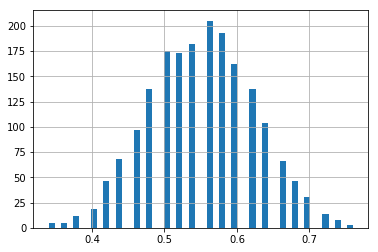

In [274]:
onlynpd['percentaccepted'].hist(bins=50)

In [259]:
%matplotlib inline

In [254]:
concatinated['accepted']=concatinated['Good']+concatinated['Perfect']+concatinated['Empty']

In [255]:
concatinated['percentaccepted'] = concatinated['accepted'] / concatinated['sum']

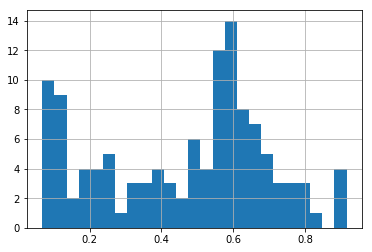

In [276]:
concatinated['percentaccepted'].hist(bins=25)

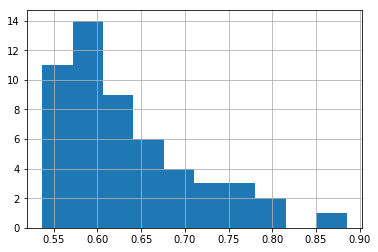

In [262]:
selectedvendors['PercentAsscepted'].hist()

In [267]:
selectednpd = onlynpd[onlynpd['percentaccepted']>0.65]

In [269]:
selectednpd.sort('percentaccepted')

C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


name   Bad  Empty  Good  Perfect  Unknown  errors   sum  \
509   NPD.150K.0014  16.0    8.0  25.0      0.0      1.0     0.0  50.0   
1718  NPD.150K.2293  13.0    7.0  25.0      1.0      4.0     0.0  50.0   
1672  NPD.150K.2247  15.0   11.0  22.0      0.0      2.0     0.0  50.0   
1670  NPD.150K.2245  16.0   14.0  17.0      2.0      1.0     0.0  50.0   
1589  NPD.150K.2164  16.0    8.0  23.0      2.0      1.0     0.0  50.0   
1584  NPD.150K.2159  16.0   15.0  14.0      4.0      1.0     0.0  50.0   
1560  NPD.150K.2135  17.0    6.0  23.0      4.0      0.0     0.0  50.0   
1475  NPD.150K.2050  16.0    9.0  19.0      5.0      1.0     0.0  50.0   
1467  NPD.150K.2042  17.0    9.0  22.0      2.0      0.0     0.0  50.0   
1458  NPD.150K.2033  15.0    9.0  23.0      1.0      2.0     0.0  50.0   
1425  NPD.150K.0930  16.0    6.0  24.0      3.0      1.0     0.0  50.0   
1389  NPD.150K.0894  16.0   12.0  17.0      4.0      1.0     0.0  50.0   
1363  NPD.150K.0868  16.0    6.0  24.0      3.0      1.0     0.0  50.0   
1353  NPD.150K.0858  14.0    4.0  26.0      3.0      3.0     0.0  50.0   
1234  NPD.150K.0739  13.0    8.0  22.0      3.0      4.0     0.0  50.0   
1195  NPD.150K.0700  15.0   12.0  20.0      1.0      2.0     0.0  50.0   
1140  NPD.150K.0645  17.0   12.0  19.0      2.0      0.0     0.0  50.0   
1119  NPD.150K.0624  16.0    9.0  23.0      1.0      1.0     0.0  50.0   
1085  NPD.150K.0590  15.0    8.0  21.0      4.0      2.0     0.0  50.0   
1063  NPD.150K.0568  15.0   10.0  21.0      2.0      2.0     0.0  50.0   
1727  NPD.150K.2302  17.0    9.0  24.0      0.0      0.0     0.0  50.0   
1742  NPD.150K.2317  11.0   12.0  18.0      3.0      6.0     0.0  50.0   
1797  NPD.150K.2372  11.0    9.0  23.0      1.0      6.0     0.0  50.0   
1888  NPD.150K.2463  14.0   10.0  20.0      3.0      3.0     0.0  50.0   
2366  NPD.150K.2941  16.0   11.0  21.0      1.0      1.0     0.0  50.0   
2357  NPD.150K.2932  15.0    8.0  23.0      2.0      2.0     0.0  50.0   
2353  NPD.150K.2928  16.0    9.0  24.0      0.0      1.0     0.0  50.0   
2258  NPD.150K.2833  13.0    8.0  21.0      4.0      4.0     0.0  50.0   
2255  NPD.150K.2830  15.0    9.0  20.0      4.0      2.0     0.0  50.0   
2229  NPD.150K.2804  16.0   12.0  19.0      2.0      1.0     0.0  50.0   
...             ...   ...    ...   ...      ...      ...     ...   ...   
798   NPD.150K.0303  15.0   10.0  22.0      3.0      0.0     0.0  50.0   
1315  NPD.150K.0820  14.0    8.0  23.0      4.0      1.0     0.0  50.0   
1815  NPD.150K.2390  13.0   11.0  21.0      3.0      2.0     0.0  50.0   
1291  NPD.150K.0796  15.0   10.0  23.0      2.0      0.0     0.0  50.0   
1317  NPD.150K.0822  13.0    9.0  24.0      2.0      2.0     0.0  50.0   
1497  NPD.150K.2072  13.0   10.0  24.0      2.0      1.0     0.0  50.0   
778   NPD.150K.0283  14.0    7.0  22.0      7.0      0.0     0.0  50.0   
904   NPD.150K.0409  12.0   12.0  21.0      3.0      2.0     0.0  50.0   
755   NPD.150K.0260  13.0    9.0  26.0      1.0      1.0     0.0  50.0   
1433  NPD.150K.2008  13.0   11.0  20.0      5.0      1.0     0.0  50.0   
2285  NPD.150K.2860  11.0   10.0  23.0      3.0      3.0     0.0  50.0   
1611  NPD.150K.2186  13.0   13.0  21.0      2.0      1.0     0.0  50.0   
1999  NPD.150K.2574  14.0    6.0  27.0      3.0      0.0     0.0  50.0   
1346  NPD.150K.0851  12.0    9.0  26.0      1.0      2.0     0.0  50.0   
1855  NPD.150K.2430  13.0   15.0  19.0      2.0      1.0     0.0  50.0   
1151  NPD.150K.0656  12.0    8.0  23.0      5.0      2.0     0.0  50.0   
2005  NPD.150K.2580  13.0    7.0  29.0      0.0      1.0     0.0  50.0   
1403  NPD.150K.0908  12.0   13.0  18.0      5.0      2.0     0.0  50.0   
2063  NPD.150K.2638  12.0   13.0  19.0      4.0      2.0     0.0  50.0   
1623  NPD.150K.2198  12.0   16.0  19.0      2.0      1.0     0.0  50.0   
1762  NPD.150K.2337  12.0   11.0  24.0      2.0      1.0     0.0  50.0   
1713  NPD.150K.2288  12.0   12.0  21.0      4.0      1.0     0.0  50.0   
876   NPD.150K.0381

In [272]:
for d in selectednpd['name']:
    copyDir(d)

In [283]:
topselectednames = selectedvendors.sort('PercentAsscepted', ascending = False)['name'].values
topselectednames

C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


array([u'Market Basket', u'Grocery Outlet Bargain Market', u'Big Lots',
       u"Wendy's", u'Safeway', u'Vons', u'DSW', u"Lucky's",
       u'Heb Food-Drugs', u'Lucky Supermarkets', u'Dollar General Store',
       u"Trader Joe's", u'Best Buy', u'Dollar General', u'Piggly Wiggly',
       u'GIANT Food Stores', u'H-E-B', u"Shaw's", u'Rite Aid', u'Publix',
       u'Nordstrom', u'Dollar Tree', u'Marshalls &#38;#38; HomeGoods',
       u'Circle K', u'7-11', u'7-Eleven', u"Marshall's", u"Macy's",
       u'Meijer', u'Walmart', u"MARTIN'S", u'Michaels Stores', u'Tops',
       u'ACME', u"Lowe's Home Centers", u'Staples', u'PetSmart',
       u'99 Cents Only Stores', u'Giant Food',
       u'Bed Bath &#38;#38; Beyond', u'Walgreens', u"Lowe's",
       u'Stop &#38;#38; Shop', u'TOPS', u'Bath &#38;#38; Body Works',
       u'Albertsons', u'Kmart', u'WinCo Foods', u"Michael's Stores",
       u'Weis Markets', u"Martin's", u'Weis', u'Jewel-Osco'], dtype=object)

In [287]:
topselectednpd = selectednpd.sort('percentaccepted', ascending = False)
topselectednpdnames = topselectednpd['name'].values

C:\tools\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [290]:
testnames = np.concatenate((topselectednames[:10:2], topselectednpdnames[:3]))

In [291]:
testnames

array([u'Market Basket', u'Big Lots', u'Safeway', u'DSW',
       u'Heb Food-Drugs', u'NPD.150K.2948', u'NPD.150K.2614',
       u'NPD.150K.0703'], dtype=object)

In [293]:
trainnames = np.concatenate((topselectednames[1:10:2], topselectednames[10:], topselectednpdnames[3:]))

In [292]:
topselectednames[1:10:2]

array([u'Grocery Outlet Bargain Market', u"Wendy's", u'Vons', u"Lucky's",
       u'Lucky Supermarkets'], dtype=object)

In [294]:
trainnames

array([u'Grocery Outlet Bargain Market', u"Wendy's", u'Vons', u"Lucky's",
       u'Lucky Supermarkets', u'Dollar General Store', u"Trader Joe's",
       u'Best Buy', u'Dollar General', u'Piggly Wiggly',
       u'GIANT Food Stores', u'H-E-B', u"Shaw's", u'Rite Aid', u'Publix',
       u'Nordstrom', u'Dollar Tree', u'Marshalls &#38;#38; HomeGoods',
       u'Circle K', u'7-11', u'7-Eleven', u"Marshall's", u"Macy's",
       u'Meijer', u'Walmart', u"MARTIN'S", u'Michaels Stores', u'Tops',
       u'ACME', u"Lowe's Home Centers", u'Staples', u'PetSmart',
       u'99 Cents Only Stores', u'Giant Food',
       u'Bed Bath &#38;#38; Beyond', u'Walgreens', u"Lowe's",
       u'Stop &#38;#38; Shop', u'TOPS', u'Bath &#38;#38; Body Works',
       u'Albertsons', u'Kmart', u'WinCo Foods', u"Michael's Stores",
       u'Weis Markets', u"Martin's", u'Weis', u'Jewel-Osco',
       u'NPD.150K.0381', u'NPD.150K.2076', u'NPD.150K.0870',
       u'NPD.150K.2152', u'NPD.150K.2198', u'NPD.150K.2288',
       u'NPD.150

In [112]:
testnames[-1]='NPD.150K.0'

In [113]:
testnames

array([u'Big Lots', u'DSW', u'Dollar General', u'Heb Food-Drugs',
       u"Shaw's", u'GIANT Food Stores', u'Lucky Supermarkets',
       u"Mariano's", u"Marshall's", u'Dollar Tree', u"Macy's", u'Walmart',
       u'7-11', u'Papa Johns', u'Nordstrom', u'Walgreens',
       u'99 Cents Only Stores', u'Weis Markets', u'Giant Food', u"Lowe's",
       u'Market Basket', u"Michael's Stores", u'Sprouts Farmers Market',
       u'ACME', u'WinCo Foods', u'Meijer', u"McDonald's",
       u'Kangaroo Express', u"Martin's Super Markets", u"Pick'n Save",
       u"Marc's", u'Ace Hardware', u'Safeway', u'Whole Foods Market',
       u'CVS', u"Wendy's", 'NPD.150K.0'], dtype=object)

In [107]:
testnames= np.concatenate((testnames, ['NPD.150K.3']))
testnames

array([u'Big Lots', u'DSW', u'Dollar General', u'Heb Food-Drugs',
       u"Shaw's", u'GIANT Food Stores', u'Lucky Supermarkets',
       u"Mariano's", u"Marshall's", u'Dollar Tree', u"Macy's", u'Walmart',
       u'7-11', u'Papa Johns', u'Nordstrom', u'Walgreens',
       u'99 Cents Only Stores', u'Weis Markets', u'Giant Food', u"Lowe's",
       u'Market Basket', u"Michael's Stores", u'Sprouts Farmers Market',
       u'ACME', u'WinCo Foods', u'Meijer', u"McDonald's",
       u'Kangaroo Express', u"Martin's Super Markets", u"Pick'n Save",
       u"Marc's", u'Ace Hardware', u'Safeway', u'Whole Foods Market',
       u'CVS', u"Wendy's", 'NPD.150K.3'], dtype=object)

In [109]:
trainnames= np.concatenate((trainnames, ['NPD.150K.2']))
trainnames

array([u'7-Eleven', u'ALDI', u'Aeropostale', u'Albertsons', u'Aldi',
       u'Aplus', u"BJ's", u"BJ's Wholesale Club",
       u'Bath &#38;#38; Body Works', u'Bed Bath &#38;#38; Beyond',
       u'Best Buy', u'CVS-pharmacy', u'Circle K', u'Costco Wholesale',
       u'Cub', u'Cub Foods', u'DUANEreade', u'Dollar General Store',
       u'Duane Reade', u'Dunkin Donuts', u"Dunkin' Donuts", u'Exchange',
       u'Family Dollar', u'Fareway', u'Fareway Stores Inc',
       u'Fine Wine &#38;#38; Good Spirits', u'Food Lion', u"Fry's",
       u'Giant Eagle', u'Grocery Outlet', u'Grocery Outlet Bargain Market',
       u'H-E-B', u'Hannaford', u"Hardee's", u'Hy-Vee', u'Ingles',
       u'Jewel-Osco', u'Kmart', u"Kohl's", u"Lowe's Home Centers",
       u"Lucky's", u"MARTIN'S", u'Marshalls &#38;#38; HomeGoods',
       u"Martin's", u'Michaels Stores', u"Papa John's", u'PetSmart',
       u"Pick 'n Save", u'Piggly Wiggly', u'Price Chopper', u'Publix',
       u'Rite Aid', u'Ross Dress For Less', u'Ross Stores'

In [114]:
np.save('../DatasetPrepare/test', testnames)

In [111]:
np.save('../DatasetPrepare/train', trainnames)

In [295]:
!pwd

/d/Python/WinPython-64bit-3.4.4.1/notebooks/diplom/Utils


In [1]:
import pandas as pd
df = pd.DataFrame()

In [ ]:
df.columns.h